In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy import interp
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc

In [130]:
df_bank= pd.read_csv('BankChurners.csv')
df_bank

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [131]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [133]:
df_bank.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [134]:
df_bank.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [135]:
df_bank

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [136]:
#check for duplicates
check_duplicate = df_bank.duplicated(keep='first')
sum(check_duplicate)

0

In [137]:
# Find catagorical and numerical columns
categorical = [col for col in df_bank.columns if df_bank[col].dtype == 'object']
numerical = [col for col in df_bank.columns if col not in categorical]

print(f"categorical columns = {len(categorical)}\nnumerical columns = {len(numerical)}\n")
print(f"Categorical column names: {categorical}\nNumerical column names: {numerical}")


categorical columns = 6
numerical columns = 17

Categorical column names: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical column names: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


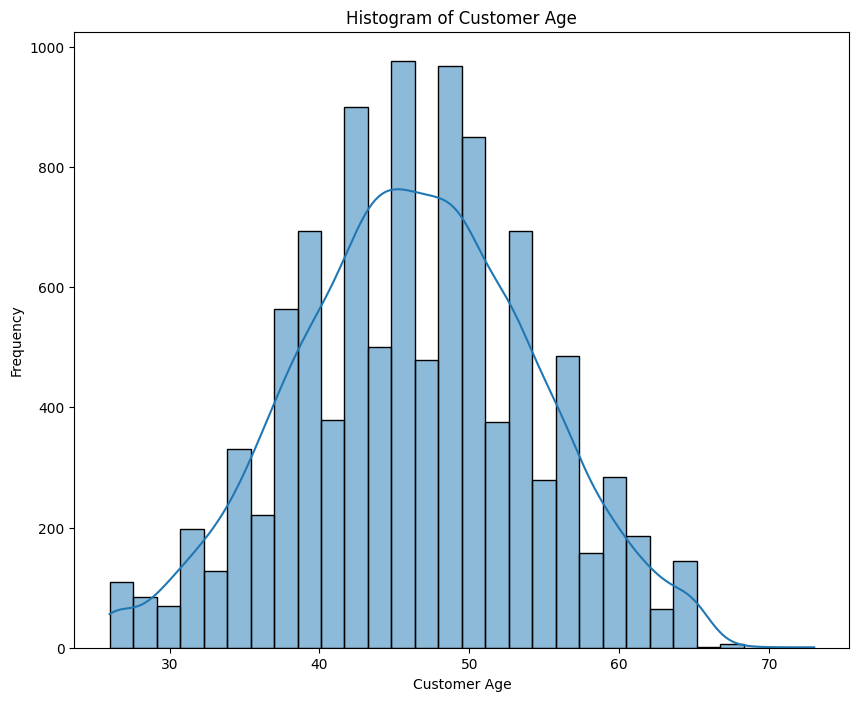

In [138]:
#Histogram of Customer Age
plt.figure(figsize=(10, 8))
sns.histplot(data=df_bank, x='Customer_Age', bins=30, kde=True)
plt.title('Histogram of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

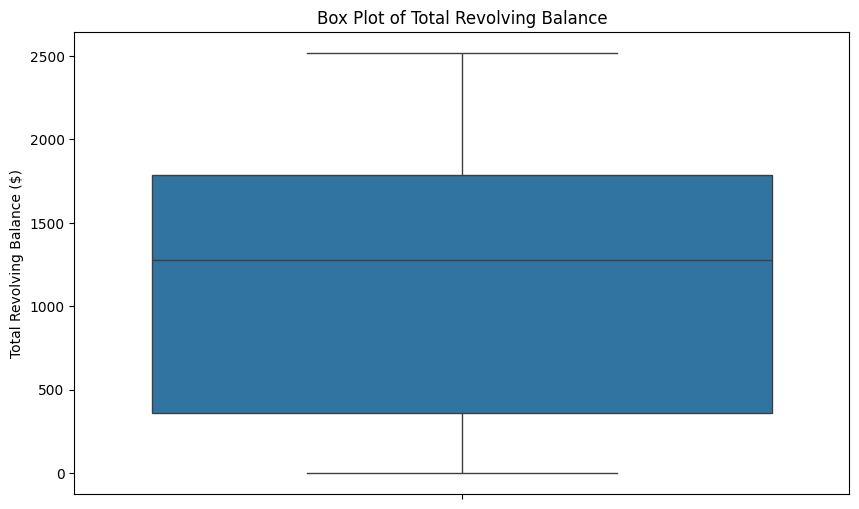

In [139]:
#Box Plot of Total Revolving Balance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bank, y='Total_Revolving_Bal')
plt.title('Box Plot of Total Revolving Balance')
plt.ylabel('Total Revolving Balance ($)')
plt.show()

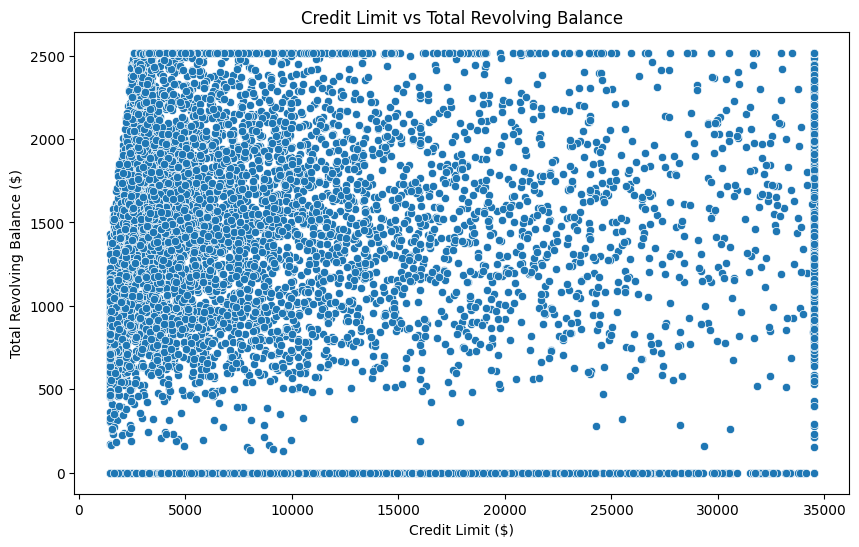

In [140]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bank, x='Credit_Limit', y='Total_Revolving_Bal')
plt.title('Credit Limit vs Total Revolving Balance')
plt.xlabel('Credit Limit ($)')
plt.ylabel('Total Revolving Balance ($)')
plt.show()


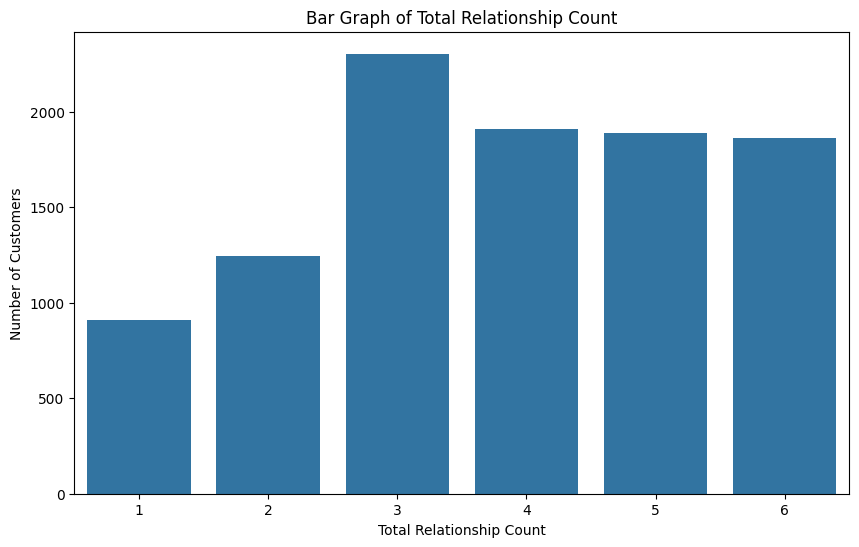

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bank, x='Total_Relationship_Count')
plt.title('Bar Graph of Total Relationship Count')
plt.xlabel('Total Relationship Count')
plt.ylabel('Number of Customers')
plt.show()


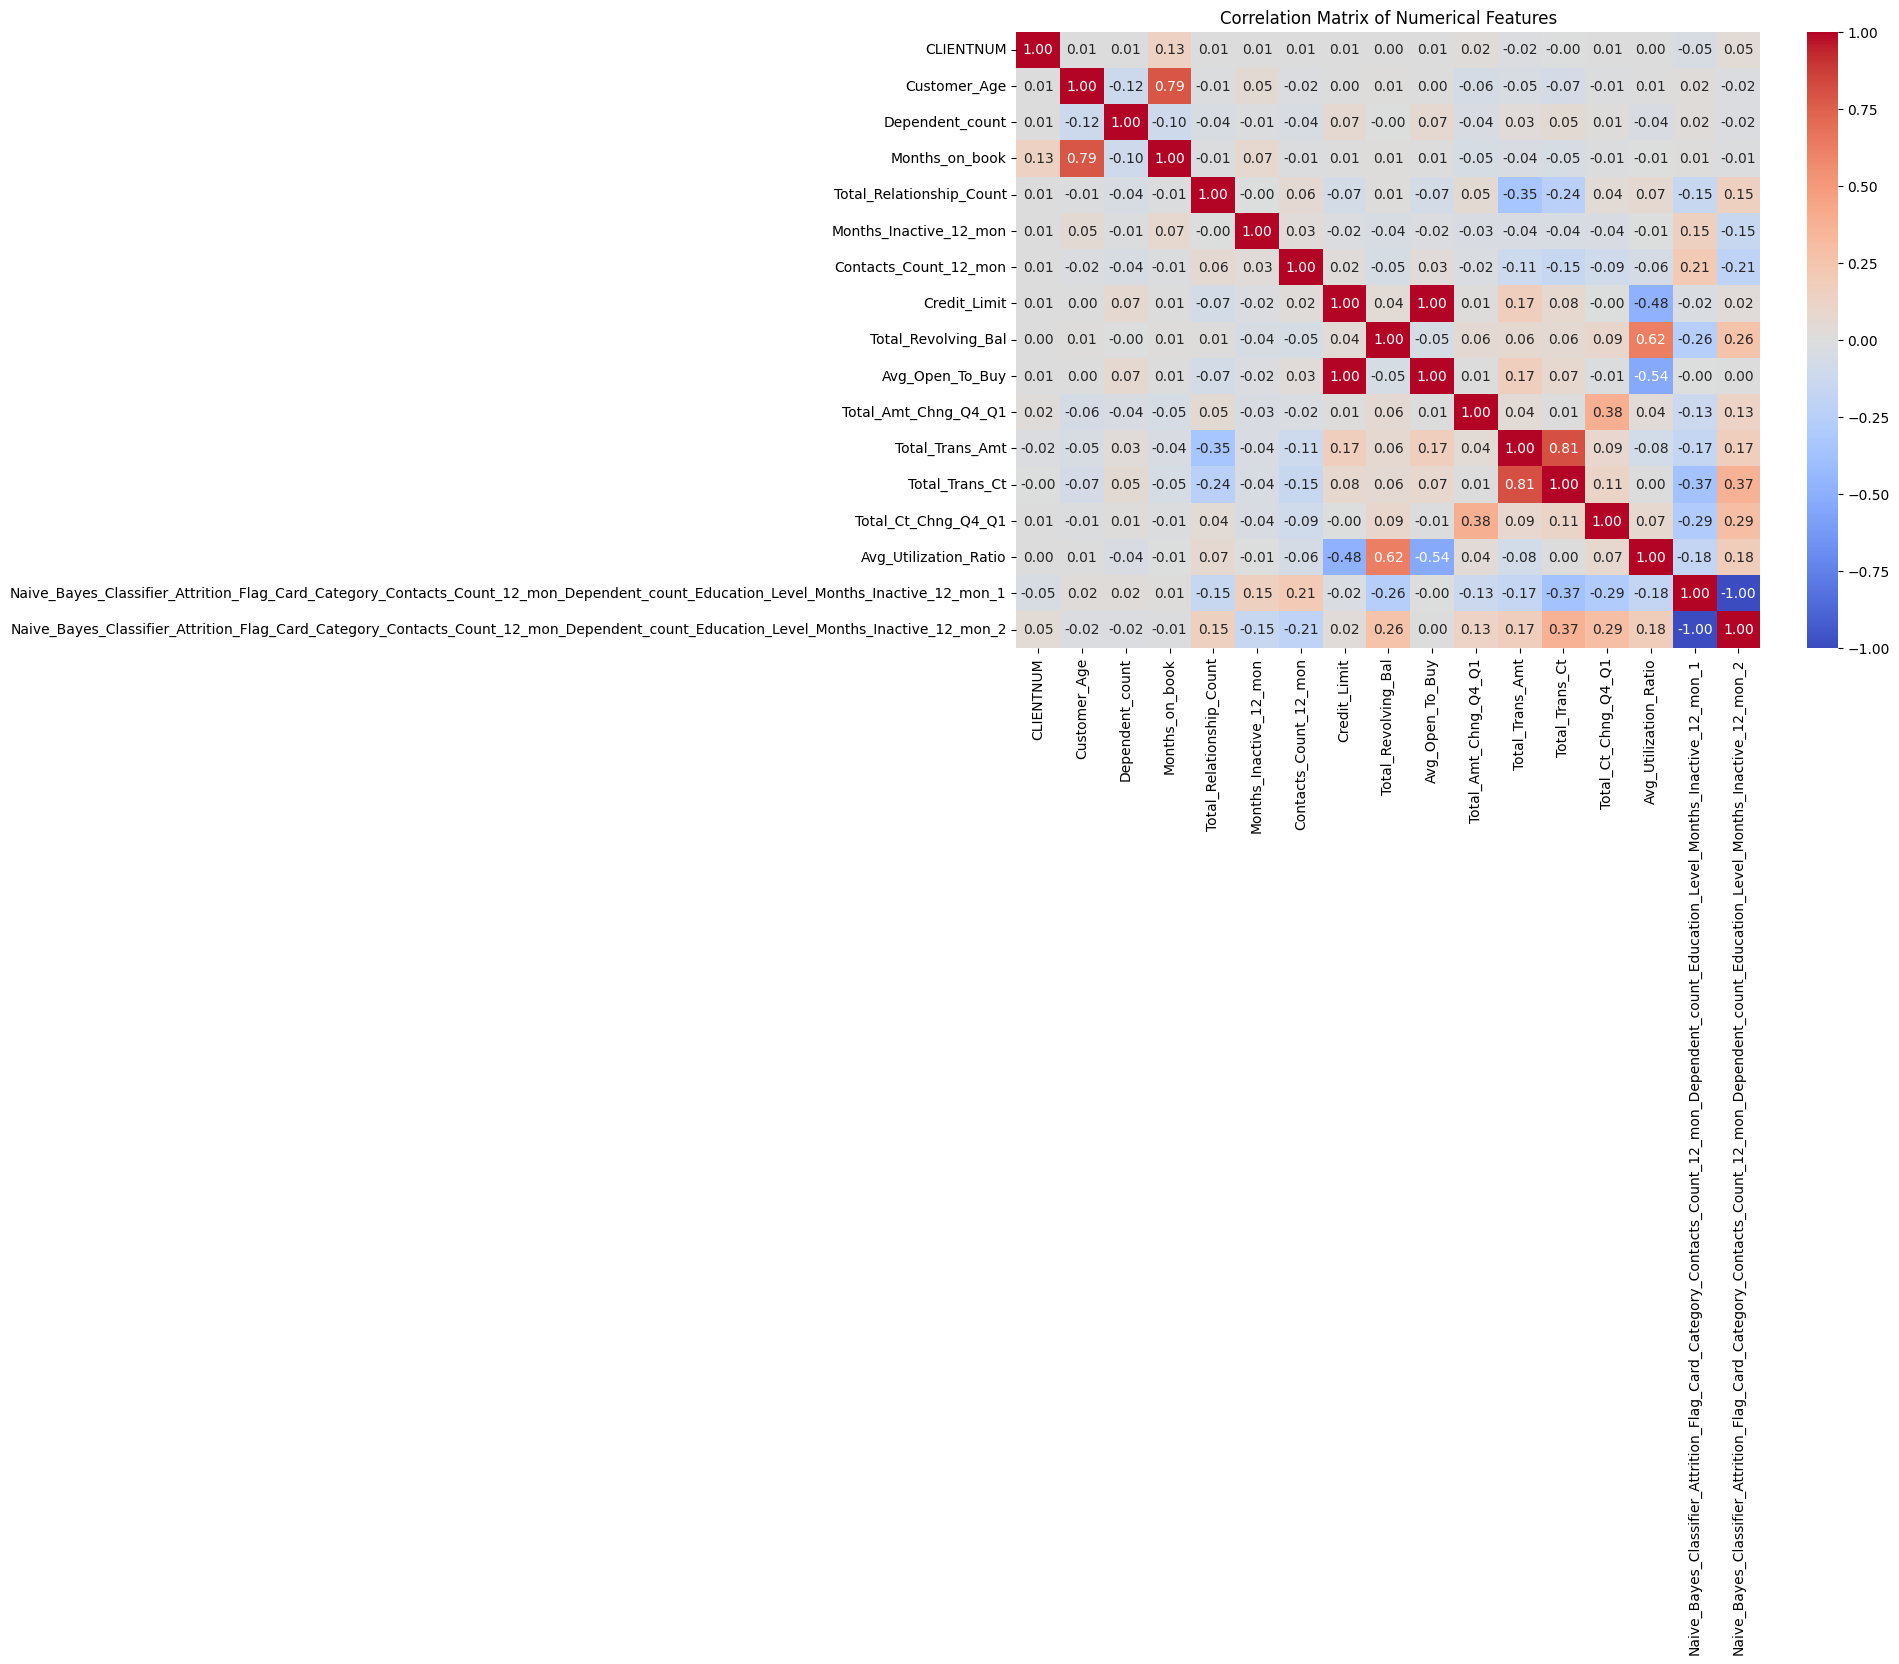

In [142]:
fig = plt.figure(figsize=(12, 8))
corr = df_bank.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
fig.savefig('/home/jupyter/heatmap-all-columns.png')


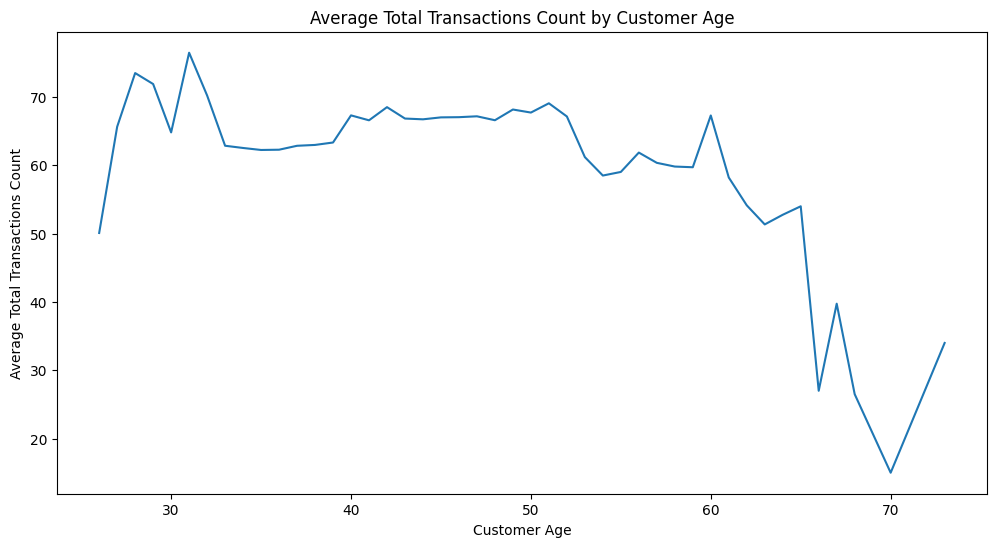

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
1905  708892833  Attrited Customer            37      M                2   
3596  827117808  Attrited Customer            45      M                1   
4417  708084558  Attrited Customer            46      M                3   
4701  824140908  Attrited Customer            52      M                3   
7165  708108333  Attrited Customer            47      F                3   
7207  815539233  Attrited Customer            54      M                4   
7998  716315508  Attrited Customer            37      F                3   

     Education_Level Marital_Status Income_Category Card_Category  \
1905        Graduate        Married         $120K +          Blue   
3596        Graduate         Single     $60K - $80K          Blue   
4417       Doctorate       Divorced    $80K - $120K          Blue   
4701      Uneducated         Single         $120K +          Blue   
7165        Graduate        Married         Unknown          Blue   
7207     High School         Single    $80K - $120K        Silver   
7998   Post-Graduate        Married     $40K - $60K          Blue   

      Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1905              30  ...       13662.0                    0          13662.0   
3596              41  ...        9904.0                 2513           7391.0   
4417              38  ...        8258.0                 1771           6487.0   
4701              48  ...       20974.0                    0          20974.0   
7165              36  ...        5590.0                    0           5590.0   
7207              49  ...       34516.0                  214          34302.0   
7998              36  ...        3233.0                 2517            716.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1905                 0.153              725              22   
3596                 0.000             1152              28   
4417                 0.000             1447              23   
4701                 0.000             1246              27   
7165                 0.010             1507              32   
7207                 0.000             1201              22   
7998                 0.000             1339              32   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
1905                  0.0                  0.000   
3596                  0.0                  0.254   
4417                  0.0                  0.214   
4701                  0.0                  0.000   
7165                  0.0                  0.000   
7207                  0.0                  0.006   
7998                  0.0                  0.779   

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
1905                                            0.99840                                                                                    
3596                                            0.99411                                                                                    
4417                                            0.99780                                                                                    
4701                                            0.99819                                                                                    
7165                                            0.99120                                                                                    
7207                                            0.99790                                                                                    
7998                                            0.99855                                                                                    

      Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
1905         

In [143]:
# Grouping by Customer Age and averaging the Total Transactions Count
age_trans = df_bank.groupby('Customer_Age')['Total_Trans_Ct'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_trans, x='Customer_Age', y='Total_Trans_Ct')
plt.title('Average Total Transactions Count by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Average Total Transactions Count')
plt.show()


df_test = df_bank.loc[df_bank['Total_Ct_Chng_Q4_Q1']==0]
df_test

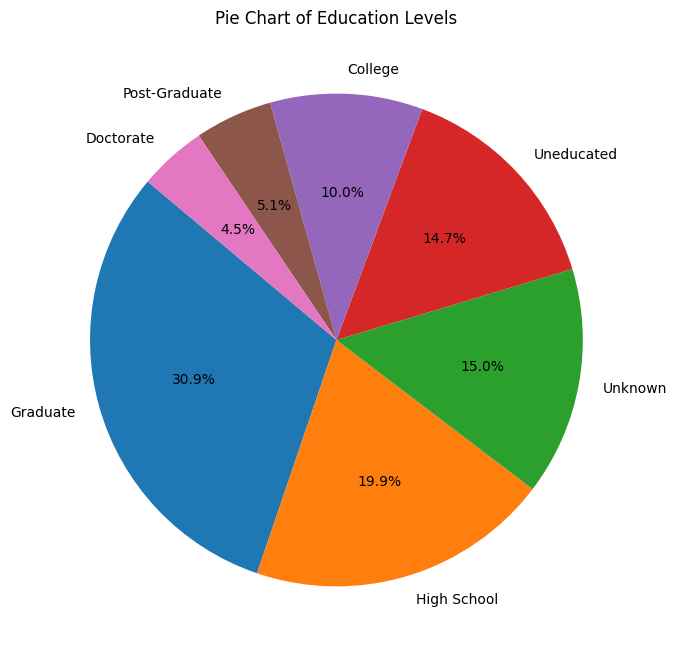

In [144]:
# Counting values for Education Level
education_counts = df_bank['Education_Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Education Levels')
plt.show()


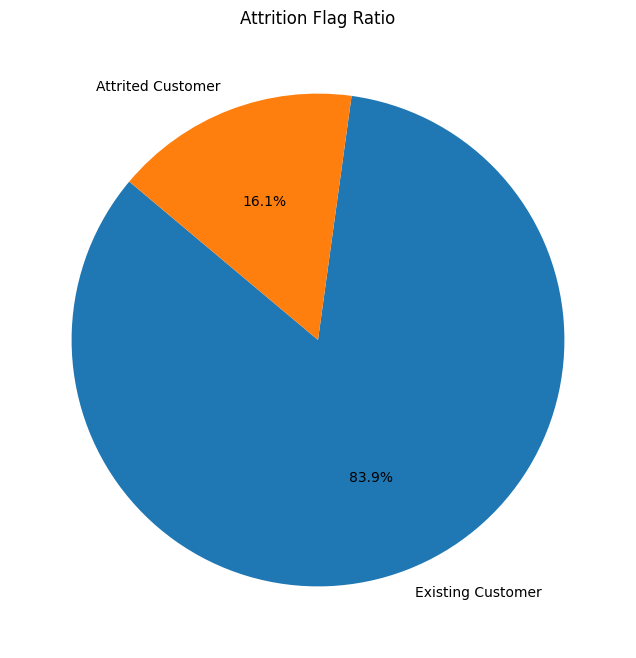

In [145]:
# Assuming 'df_bank' is your DataFrame and 'Attrition_Flag' is the column of interest.
attrition_counts = df_bank['Attrition_Flag'].value_counts(normalize=True)  # Get the relative frequencies

# Display the ratios in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Flag Ratio')
plt.show()

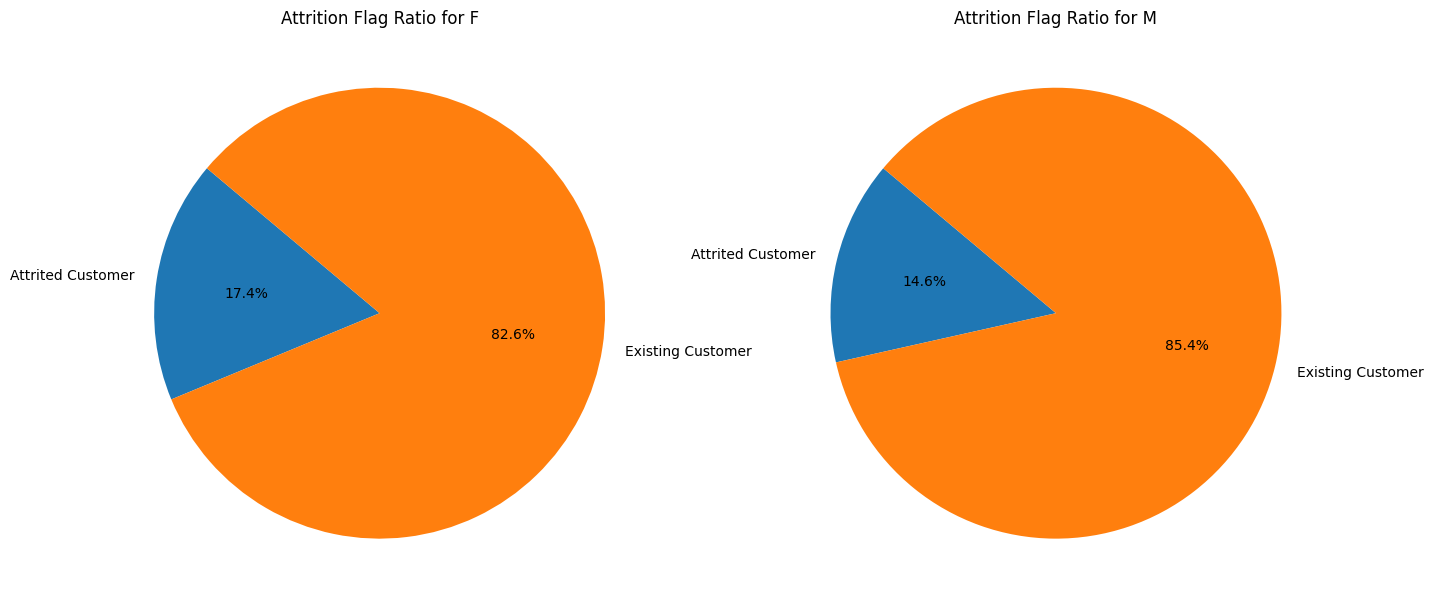

In [146]:
# Group the data by gender and attrition flag, then count the occurrences
attrition_by_gender = df_bank.groupby(['Gender', 'Attrition_Flag']).size().unstack()
# Normalize the counts to get ratios
attrition_ratios_by_gender = attrition_by_gender.div(attrition_by_gender.sum(axis=1), axis=0)
# Create pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for i, (gender, ratios) in enumerate(attrition_ratios_by_gender.iterrows()):
    axes[i].pie(ratios, labels=ratios.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Attrition Flag Ratio for {gender}')
plt.show()

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

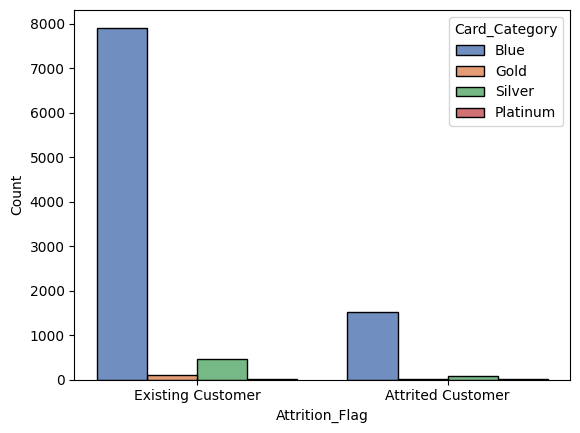

In [147]:
# sns.histplot(df_bank, x='Attrition_Flag', hue='Card_Category')
sns.histplot(df_bank, x='Attrition_Flag', hue='Card_Category', palette='deep', multiple='dodge', shrink=0.8, alpha=0.8)


<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

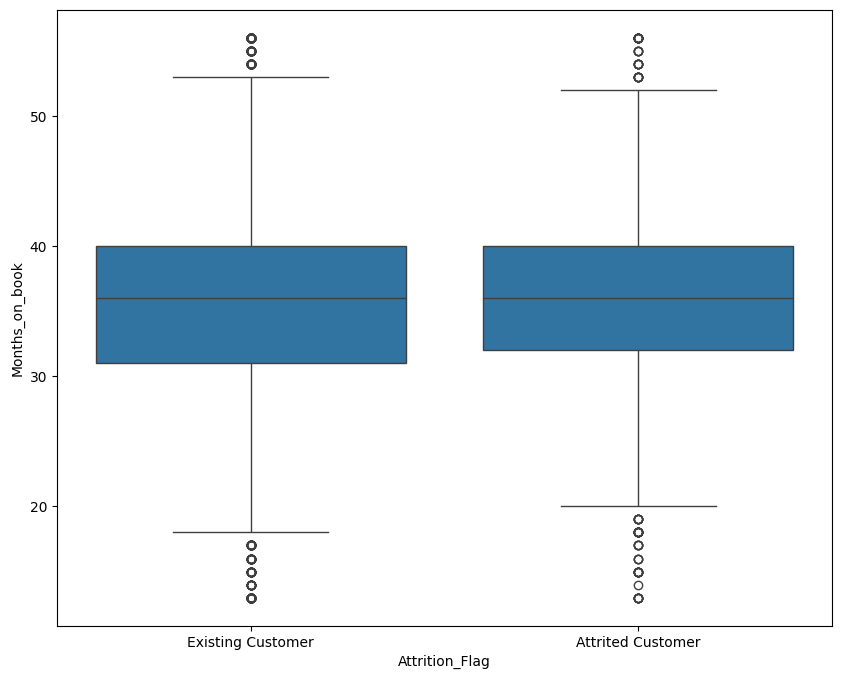

In [148]:
plt.figure(figsize=(10, 8))
sns.boxplot(df_bank, x='Attrition_Flag', y='Months_on_book')

<Axes: xlabel='Months_on_book', ylabel='Density'>

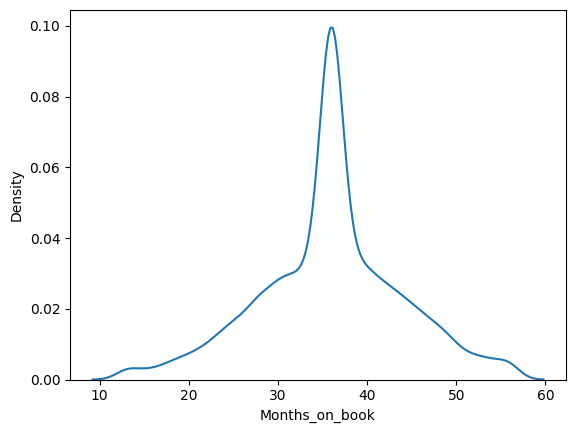

In [149]:
sns.kdeplot(df_bank, x='Months_on_book')

<Axes: xlabel='Attrition_Flag', ylabel='Count'>

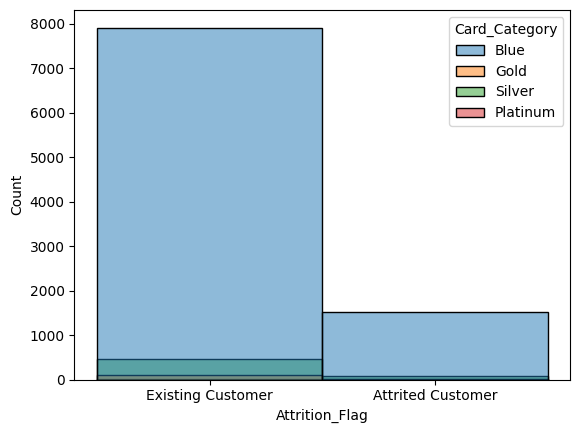

In [150]:
sns.histplot(df_bank, x='Attrition_Flag', hue='Card_Category')

<Axes: xlabel='Attrition_Flag', ylabel='Months_on_book'>

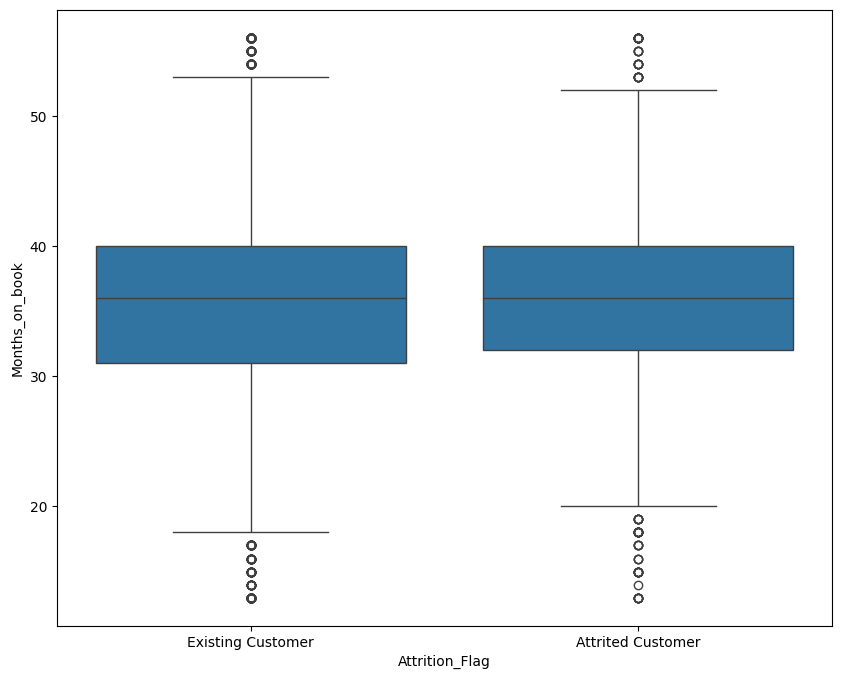

In [151]:
plt.figure(figsize=(10, 8))
sns.boxplot(df_bank, x='Attrition_Flag', y='Months_on_book')

In [152]:
feature_bank= df_bank.drop(['CLIENTNUM', 'Gender',
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
                           axis=1)
feature_bank

Attrition_Flag  Customer_Age  Dependent_count Education_Level  \
0      Existing Customer            45                3     High School   
1      Existing Customer            49                5        Graduate   
2      Existing Customer            51                3        Graduate   
3      Existing Customer            40                4     High School   
4      Existing Customer            40                3      Uneducated   
...                  ...           ...              ...             ...   
10122  Existing Customer            50                2        Graduate   
10123  Attrited Customer            41                2         Unknown   
10124  Attrited Customer            44                1     High School   
10125  Attrited Customer            30                2        Graduate   
10126  Attrited Customer            43                2        Graduate   

      Marital_Status Income_Category Card_Category  Months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0   

In [155]:
feature_bank.columns= feature_bank.columns.str.lower()
feature_bank

attrition_flag  customer_age  dependent_count education_level  \
0      Existing Customer            45                3     High School   
1      Existing Customer            49                5        Graduate   
2      Existing Customer            51                3        Graduate   
3      Existing Customer            40                4     High School   
4      Existing Customer            40                3      Uneducated   
...                  ...           ...              ...             ...   
10122  Existing Customer            50                2        Graduate   
10123  Attrited Customer            41                2         Unknown   
10124  Attrited Customer            44                1     High School   
10125  Attrited Customer            30                2        Graduate   
10126  Attrited Customer            43                2        Graduate   

      marital_status income_category card_category  months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3            Unknown  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125        Unknown     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       total_relationship_count  months_inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0   

In [156]:
feature_bank['education_level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [157]:
feature_bank['marital_status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [158]:
feature_bank['income_category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [159]:
feature_bank['card_category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [160]:
feature_bank['income_category'].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [161]:
feature_bank['income_category'].value_counts()/feature_bank.shape[0]

income_category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: count, dtype: float64

In [162]:
feature_bank['marital_status'].value_counts()/feature_bank.shape[0]

marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: count, dtype: float64

In [163]:
#feature_bank[:1:]
feature_bank

df_test = feature_bank.loc[feature_bank['total_ct_chng_q4_q1']==0]
df_test

attrition_flag  customer_age  dependent_count education_level  \
1905  Attrited Customer            37                2        Graduate   
3596  Attrited Customer            45                1        Graduate   
4417  Attrited Customer            46                3       Doctorate   
4701  Attrited Customer            52                3      Uneducated   
7165  Attrited Customer            47                3        Graduate   
7207  Attrited Customer            54                4     High School   
7998  Attrited Customer            37                3   Post-Graduate   

     marital_status income_category card_category  months_on_book  \
1905        Married         $120K +          Blue              30   
3596         Single     $60K - $80K          Blue              41   
4417       Divorced    $80K - $120K          Blue              38   
4701         Single         $120K +          Blue              48   
7165        Married         Unknown          Blue              36   
7207         Single    $80K - $120K        Silver              49   
7998        Married     $40K - $60K          Blue              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
1905                         2                       4                      4   
3596                         2                       3                      2   
4417                         6                       3                      3   
4701                         5                       3                      4   
7165                         3                       3                      1   
7207                         1                       3                      4   
7998                         2                       2                      5   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
1905       13662.0                    0          13662.0   
3596        9904.0                 2513           7391.0   
4417        8258.0                 1771           6487.0   
4701       20974.0                    0          20974.0   
7165        5590.0                    0           5590.0   
7207       34516.0                  214          34302.0   
7998        3233.0                 2517            716.0   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
1905                 0.153              725              22   
3596                 0.000             1152              28   
4417                 0.000             1447              23   
4701                 0.000             1246              27   
7165                 0.010             1507              32   
7207                 0.000             1201              22   
7998                 0.000             1339              32   

      total_ct_chng_q4_q1  avg_utilization_ratio  
1905                  0.0                  0.000  
3596                  0.0                  0.254  
4417                  0.0                  0.214  
4701                  0.0                  0.000  
7165                  0.0                  0.000  
7207                  0.0                  0.006  
7998                  0.0                  0.779

In [164]:
feature_bank['customer_age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: customer_age
Non-Null Count  Dtype
--------------  -----
10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


In [165]:
df_test = feature_bank.loc[feature_bank['total_ct_chng_q4_q1']==0]
drop_rows= df_test[df_test[['education_level', 'marital_status', 'income_category', 'card_category']].isin(['Unknown']).any(axis=1)].index
drop_rows_data =df_test[df_test.index.isin(drop_rows)]
drop_rows_data


attrition_flag  customer_age  dependent_count education_level  \
7165  Attrited Customer            47                3        Graduate   

     marital_status income_category card_category  months_on_book  \
7165        Married         Unknown          Blue              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
7165                         3                       3                      1   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
7165        5590.0                    0           5590.0   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
7165                  0.01             1507              32   

      total_ct_chng_q4_q1  avg_utilization_ratio  
7165                  0.0                    0.0

In [166]:
drop_rows= feature_bank[feature_bank[['education_level', 'marital_status', 'income_category', 'card_category']].isin(['Unknown']).any(axis=1)].index
#feature_bank= feature_bank.drop(index= drop_rows).reset_index(drop=True)
feature_bank[feature_bank.index.isin(drop_rows)]


attrition_flag  customer_age  dependent_count education_level  \
3      Existing Customer            40                4     High School   
6      Existing Customer            51                4         Unknown   
7      Existing Customer            32                0     High School   
10     Existing Customer            42                5      Uneducated   
11     Existing Customer            65                1         Unknown   
...                  ...           ...              ...             ...   
10101  Existing Customer            42                2        Graduate   
10118  Attrited Customer            50                1         Unknown   
10119  Attrited Customer            55                3      Uneducated   
10123  Attrited Customer            41                2         Unknown   
10125  Attrited Customer            30                2        Graduate   

      marital_status income_category card_category  months_on_book  \
3            Unknown  Less than $40K          Blue              34   
6            Married         $120K +          Gold              46   
7            Unknown     $60K - $80K        Silver              27   
10           Unknown         $120K +          Blue              31   
11           Married     $40K - $60K          Blue              54   
...              ...             ...           ...             ...   
10101        Unknown     $40K - $60K          Blue              30   
10118        Unknown    $80K - $120K          Blue              36   
10119         Single         Unknown          Blue              47   
10123       Divorced     $40K - $60K          Blue              25   
10125        Unknown     $40K - $60K          Blue              36   

       total_relationship_count  months_inactive_12_mon  \
3                             3                       4   
6                             6                       1   
7                             2                       2   
10                            5                       3   
11                            6                       2   
...                         ...                     ...   
10101                         3                       2   
10118                         6                       3   
10119                         4                       3   
10123                         4                       2   
10125                         4                       3   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
3                          1        3313.0                 2517   
6                          3       34516.0                 2264   
7                          2       29081.0                 1396   
10                         2        6748.0                 1467   
11                         3        9095.0                 1587   
...                      ...           ...                  ...   
10101                      5        3735.0                 1723   
10118                      4        9959.0                  952   
10119                      3       14657.0                 2517   
10123                      3        4277.0                 2186   
10125                      3        5281.0                    0   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
3                796.0                 1.405             1171              20   
6              32252.0                 1.975             1330              31   
7              27685.0                 2.204             1538              36   
10              5281.0                 0.831             1201              42   
11              7508.0                 1.433             1314              26   
...                ...                   ...              ...             ...   
10101           2012.0                 0.595            14501              92   
10118           9007.0                 0.825            10310              63   
10119          12140.0   

In [43]:
feature_bank['education_level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [44]:
feature_bank['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [45]:
feature_bank['income_category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [46]:
feature_bank['card_category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [47]:
final_bank_features= pd.get_dummies(feature_bank, drop_first=True)
final_bank_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      7081 non-null   int64  
 1   dependent_count                   7081 non-null   int64  
 2   months_on_book                    7081 non-null   int64  
 3   total_relationship_count          7081 non-null   int64  
 4   months_inactive_12_mon            7081 non-null   int64  
 5   contacts_count_12_mon             7081 non-null   int64  
 6   credit_limit                      7081 non-null   float64
 7   total_revolving_bal               7081 non-null   int64  
 8   avg_open_to_buy                   7081 non-null   float64
 9   total_amt_chng_q4_q1              7081 non-null   float64
 10  total_trans_amt                   7081 non-null   int64  
 11  total_trans_ct                    7081 non-null   int64  
 12  total_

<Axes: >

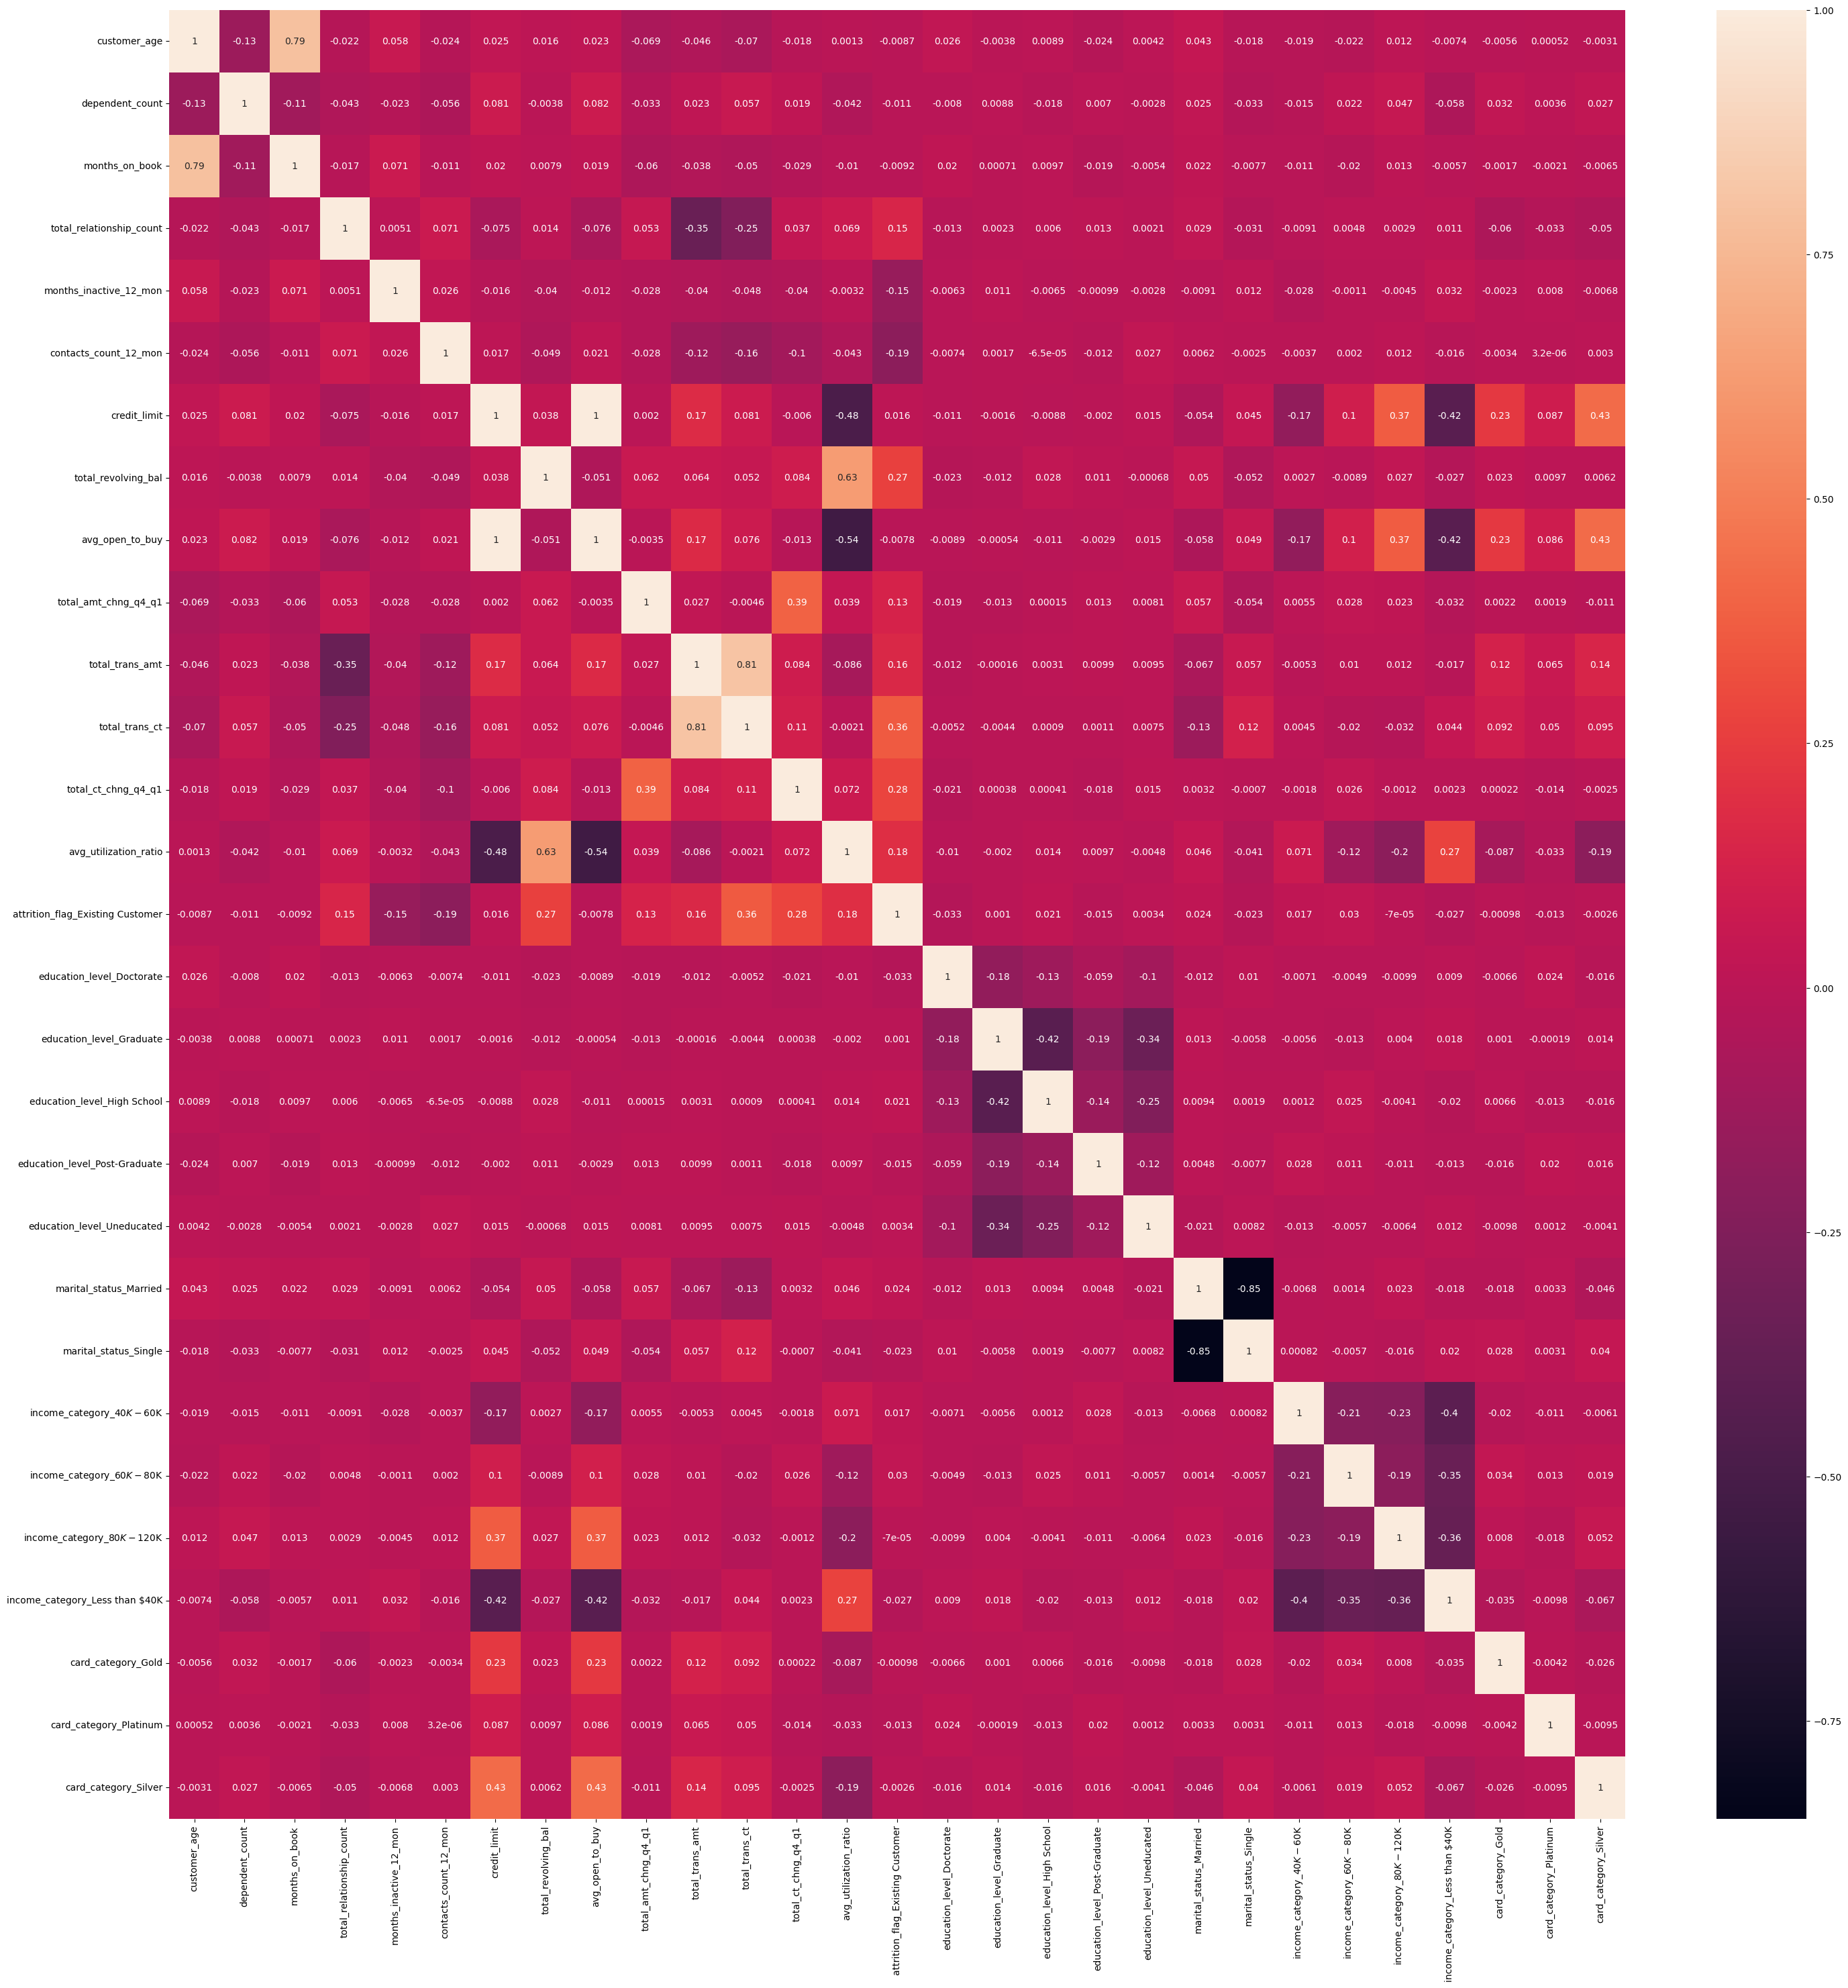

In [48]:
plt.figure(figsize=(35,35))
sns.heatmap(final_bank_features.corr(), annot=True)

In [49]:
final_bank_features['avg_amt_per_trans'] = final_bank_features['total_trans_amt'] / final_bank_features['total_trans_ct']
final_bank_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_age                      7081 non-null   int64  
 1   dependent_count                   7081 non-null   int64  
 2   months_on_book                    7081 non-null   int64  
 3   total_relationship_count          7081 non-null   int64  
 4   months_inactive_12_mon            7081 non-null   int64  
 5   contacts_count_12_mon             7081 non-null   int64  
 6   credit_limit                      7081 non-null   float64
 7   total_revolving_bal               7081 non-null   int64  
 8   avg_open_to_buy                   7081 non-null   float64
 9   total_amt_chng_q4_q1              7081 non-null   float64
 10  total_trans_amt                   7081 non-null   int64  
 11  total_trans_ct                    7081 non-null   int64  
 12  total_

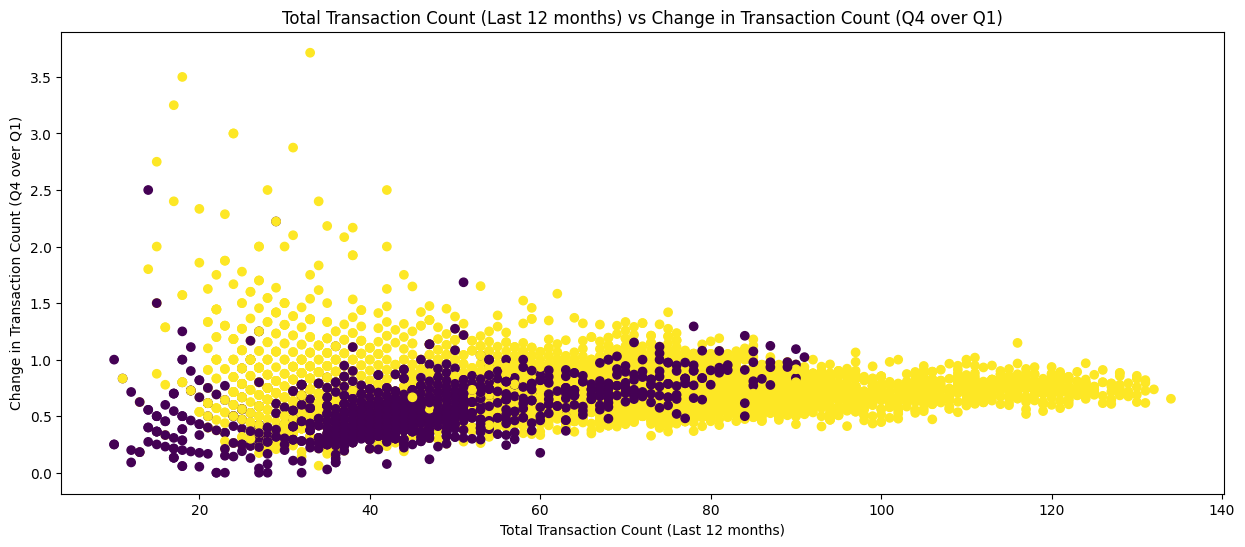

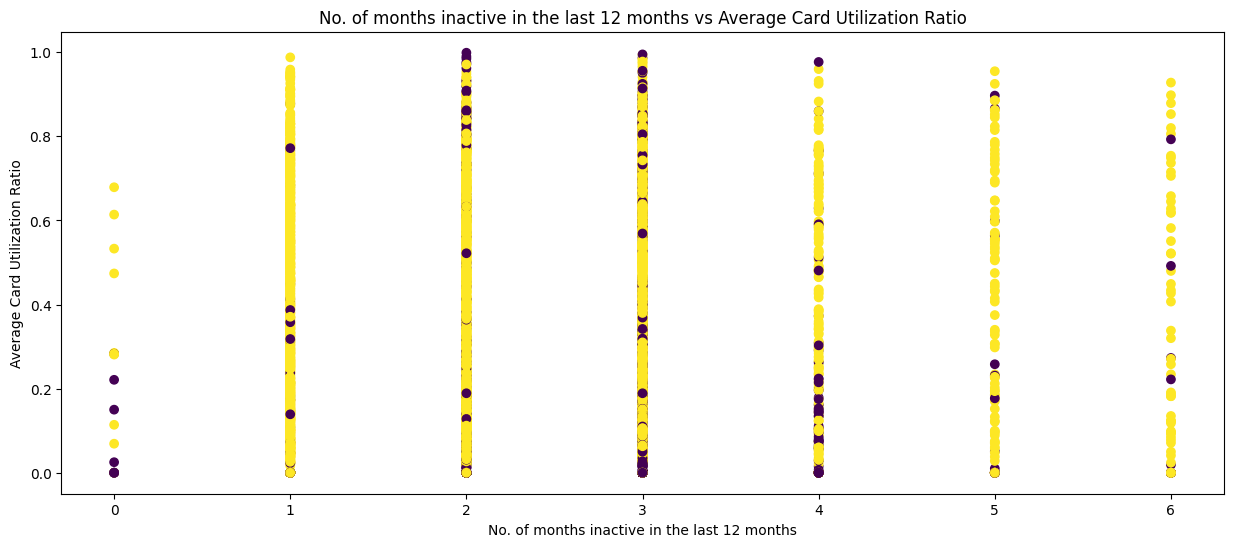

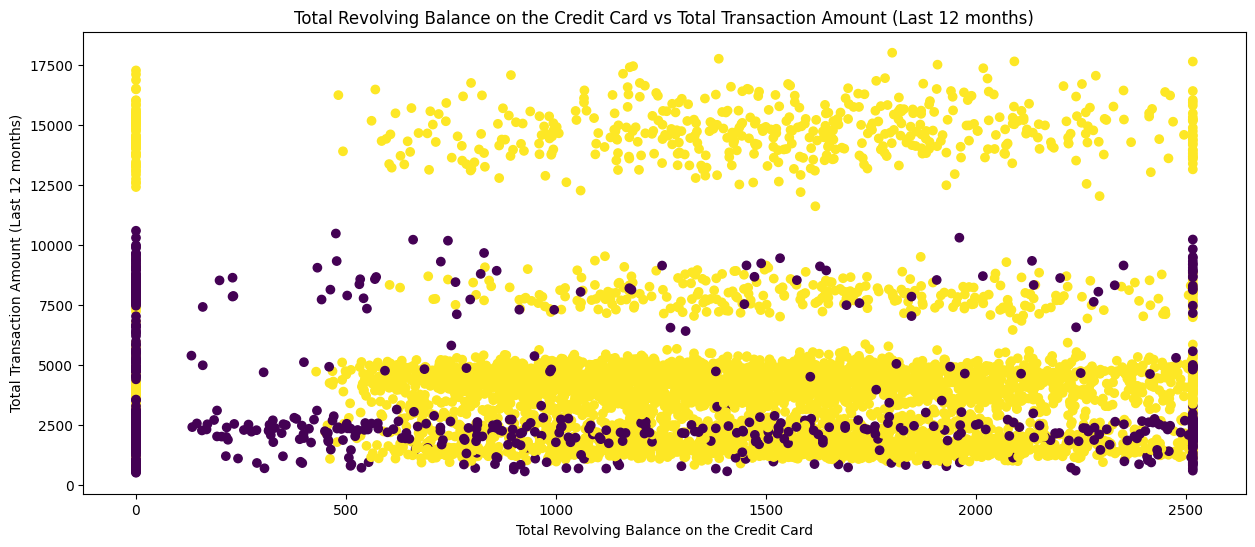

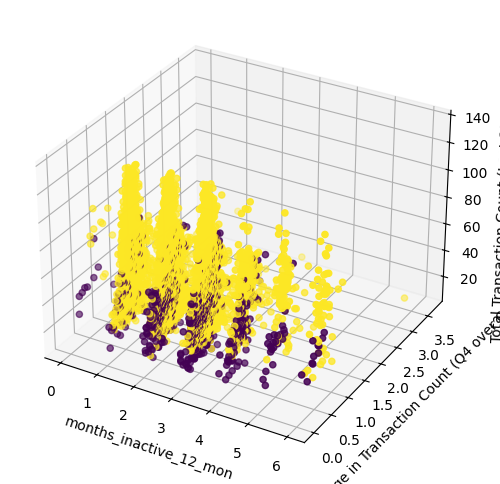

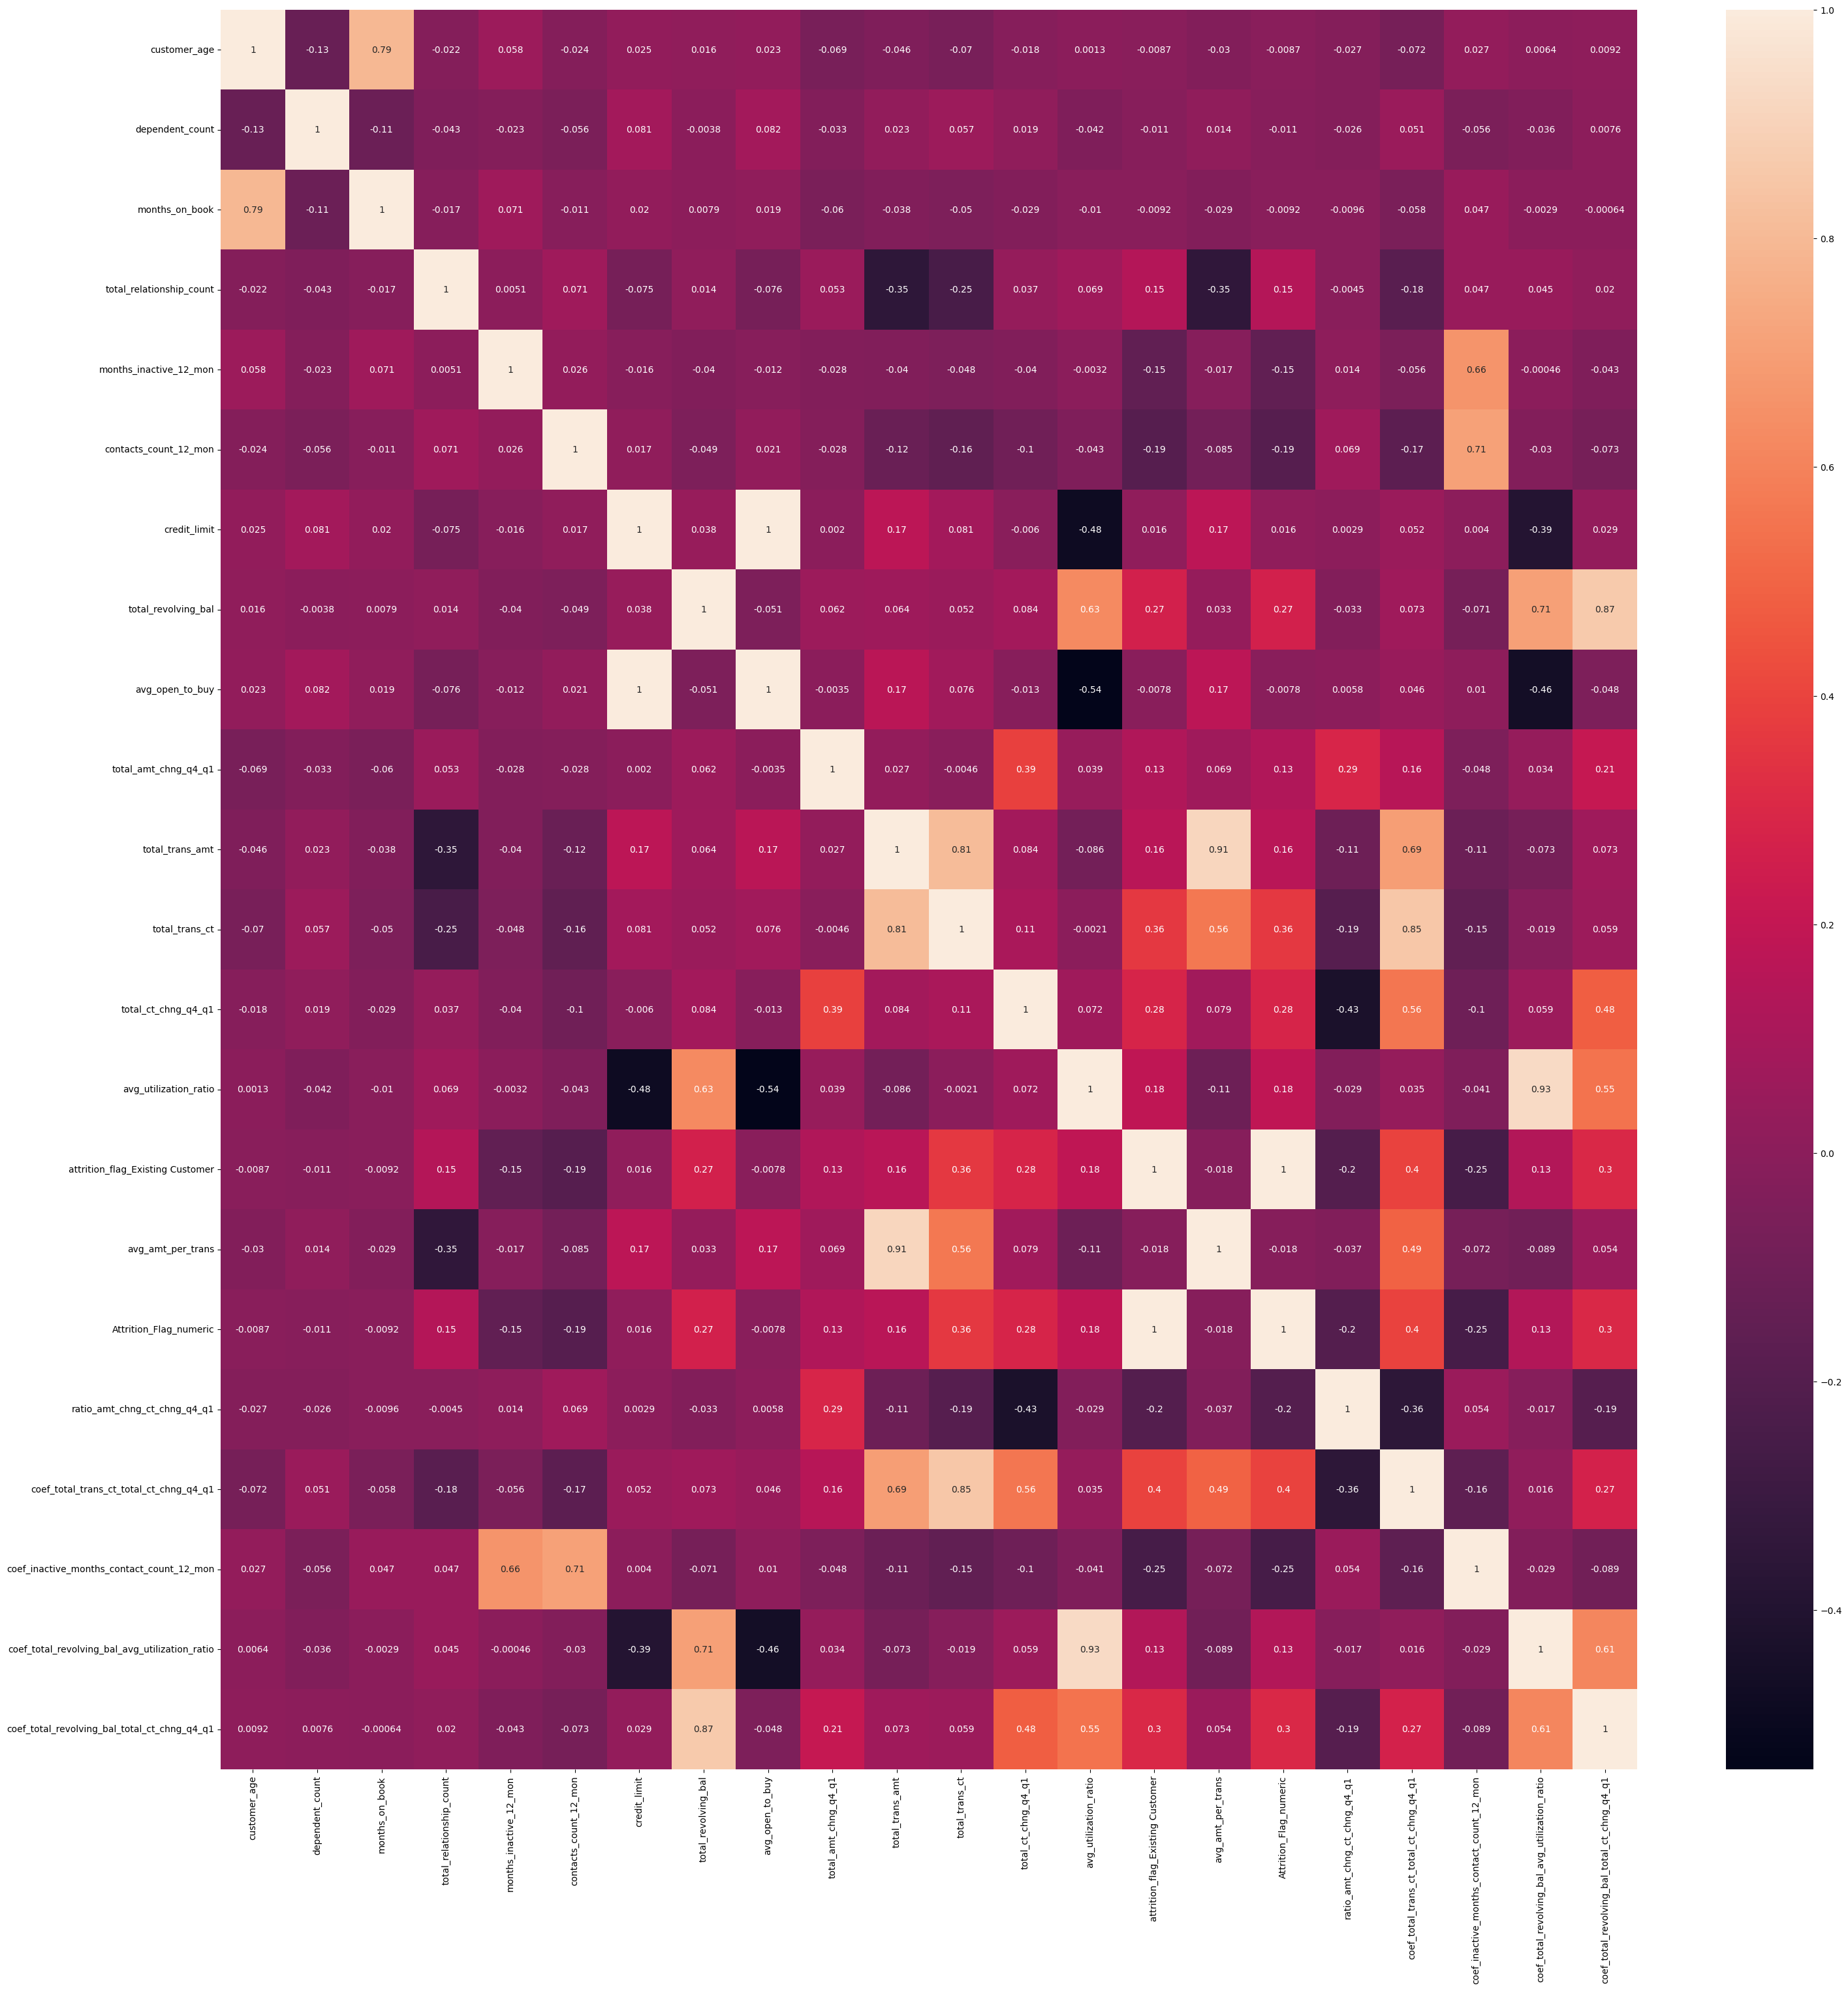

In [55]:

df_plot = final_bank_features.copy()
df_plot['Attrition_Flag_numeric'] = df_plot['attrition_flag_Existing Customer'].astype(int)

plt.figure(figsize=(15, 6))
#sns.scatterplot(data=df_bank, x='Total_Trans_Ct', y='Total_Ct_Chng_Q4_Q1')
plt.scatter(df_plot['total_trans_ct'], df_plot['total_ct_chng_q4_q1'], c=df_plot['Attrition_Flag_numeric'])
plt.title('Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')
plt.xlabel('Total Transaction Count (Last 12 months)')
plt.ylabel('Change in Transaction Count (Q4 over Q1)')
# plt.colorbar()
plt.show()

fig = plt.figure(figsize=(15, 6))
plt.scatter(df_plot['months_inactive_12_mon'], df_plot['avg_utilization_ratio'], c=df_plot['Attrition_Flag_numeric'])
plt.title('No. of months inactive in the last 12 months vs Average Card Utilization Ratio')
plt.xlabel('No. of months inactive in the last 12 months')
plt.ylabel('Average Card Utilization Ratio')
plt.show()
fig.savefig('/home/jupyter/2d-avg_months_inactive_12_mon-utilization_ratio.png')

fig = plt.figure(figsize=(15, 6))
plt.scatter(df_plot['total_revolving_bal'], df_plot['total_trans_amt'], c=df_plot['Attrition_Flag_numeric'])
plt.title('Total Revolving Balance on the Credit Card vs Total Transaction Amount (Last 12 months)')
plt.xlabel('Total Revolving Balance on the Credit Card')
plt.ylabel('Total Transaction Amount (Last 12 months)')
plt.show()
fig.savefig('/home/jupyter/2d-total_revolving_bal-total_trans_amt.png')

fig = plt.figure(figsize=(15, 6))
projection = fig.add_subplot(projection='3d')
projection.scatter(df_plot['months_inactive_12_mon'], df_plot['total_ct_chng_q4_q1'], df_plot['total_trans_ct'], c=df_plot['Attrition_Flag_numeric'])
projection.set_xlabel('months_inactive_12_mon')
projection.set_ylabel('Change in Transaction Count (Q4 over Q1)')
projection.set_zlabel('Total Transaction Count (Last 12 months)')
# print(fig.get_size_inches())
plt.show()
fig.savefig('/home/jupyter/3d-test.png')


df_plot_fe = df_plot.drop(['education_level_Graduate', 'education_level_Post-Graduate','education_level_Doctorate', 
                           'education_level_High School', 'education_level_Uneducated', 
                           'card_category_Gold', 'card_category_Platinum', 'card_category_Silver', 
                           'marital_status_Married', 'marital_status_Single', 
                           'income_category_$40K - $60K', 'income_category_$60K - $80K', 'income_category_$80K - $120K', 'income_category_Less than $40K'],
                           axis=1)

df_plot_fe['ratio_amt_chng_ct_chng_q4_q1'] = df_plot_fe['total_amt_chng_q4_q1'] / df_plot_fe['total_ct_chng_q4_q1']
df_plot_fe.loc[df_plot_fe['ratio_amt_chng_ct_chng_q4_q1'].isnull(), 'ratio_amt_chng_ct_chng_q4_q1'] = 0
df_plot_fe.loc[np.isinf(df_plot_fe['ratio_amt_chng_ct_chng_q4_q1'])==True, 'ratio_amt_chng_ct_chng_q4_q1'] = 0

df_plot_fe['coef_total_trans_ct_total_ct_chng_q4_q1'] = df_plot_fe['total_trans_ct'] * df_plot_fe['total_ct_chng_q4_q1']

df_plot_fe['coef_inactive_months_contact_count_12_mon'] = df_plot_fe['months_inactive_12_mon'] * df_plot_fe['contacts_count_12_mon']
df_plot_fe['coef_total_revolving_bal_avg_utilization_ratio'] = df_plot_fe['total_revolving_bal'] * df_plot_fe['avg_utilization_ratio']
df_plot_fe['coef_total_revolving_bal_total_ct_chng_q4_q1'] = df_plot_fe['total_revolving_bal'] * df_plot_fe['total_ct_chng_q4_q1']

plt.figure(figsize=(35,35))
sns.heatmap(df_plot_fe.corr(), annot=True)
plt.savefig('/home/jupyter/heatmap-feature-engineered.png')


In [57]:
df_plot_fe.loc[np.isinf(df_plot_fe['ratio_amt_chng_ct_chng_q4_q1'])==True]
df_plot_fe.loc[df_plot_fe['ratio_amt_chng_ct_chng_q4_q1'].isnull()]

Empty DataFrame
Columns: [customer_age, dependent_count, months_on_book, total_relationship_count, months_inactive_12_mon, contacts_count_12_mon, credit_limit, total_revolving_bal, avg_open_to_buy, total_amt_chng_q4_q1, total_trans_amt, total_trans_ct, total_ct_chng_q4_q1, avg_utilization_ratio, attrition_flag_Existing Customer, avg_amt_per_trans, Attrition_Flag_numeric, ratio_amt_chng_ct_chng_q4_q1, coef_total_trans_ct_total_ct_chng_q4_q1, coef_inactive_months_contact_count_12_mon, coef_total_revolving_bal_avg_utilization_ratio, coef_total_revolving_bal_total_ct_chng_q4_q1]
Index: []

[0 rows x 22 columns]

In [58]:
# columns=list(df_plot_fe)
# pair_wise = sns.pairplot(df_plot_fe[columns], hue="Attrition_Flag_numeric", height=2.4, aspect=2, plot_kws=dict(edgecolor="k", linewidth=0.5), 
#                          diag_kind="kde", diag_kws=dict(fill=True))
# fig = pair_wise.fig
# fig.subplots_adjust(top=0.93, wspace=0.3)
# plt.savefig('/home/jupyter/pairwise-new.png')

In [59]:
def mscatter_two_layer(dimensions, predict, truth, col_x, col_y, color_a, color_b, color_a_error, color_b_error, title=''):
    scatter_x = dimensions[[col_x, col_y]].copy()
    scatter_x['predict'] = predict.copy()
    scatter_x['truth'] = truth.copy()
    scatter_x['truth_digit'] = truth.copy().astype(int)
    scatter_x['predict_result'] = (scatter_x['predict'] == scatter_x['truth'])
    scatter_x.loc[scatter_x['predict_result']==True, 'predict_shape'] = "o"
    scatter_x.loc[scatter_x['predict_result']==False, 'predict_shape'] = "*"
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot()
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for index, entry in scatter_x.iterrows():
        xs = entry[col_x]
        ys = entry[col_y]
        m = entry['predict_shape']
        ad = entry['truth_digit']
        # True attrited customers
        if ad == 0:
            alpha = 0.8
            if entry['predict_result']==True:
                color = color_a
                zo = 5
                tp += 1
                p1 = ax.scatter(xs, ys,  c=color, marker=m, zorder=zo, linewidths=1, alpha=alpha) # True positive
            # Predicted as existing customers
            else:
                color = color_a_error
                zo = 15
                fn += 1
                p2 = ax.scatter(xs, ys, c=color, marker=m, zorder=zo, linewidths=1, alpha=alpha)# 'False Negative'
        # True existing customers
        else:
            alpha = 1
            if entry['predict_result']==True:
                color = color_b
                zo = 0
                tn += 1
                p3 = ax.scatter(xs, ys, c=color, marker=m, zorder=zo, linewidths=1, alpha=alpha) # 'True Negative'
            # Predicted as attrited customers
            else:
                color = color_b_error
                zo = 10
                fp += 1
                p4 = ax.scatter(xs, ys, c=color, marker=m, zorder=zo, linewidths=1, alpha=alpha) # 'False Positive'

    ax.legend([p1, p4, p3, p2], ['True Positive: ' + str(tp), 'False Positive: ' + str(fp), 'True Negative: ' + str(tn), 'False Negative: ' + str(fn)], 
              loc="upper right", title="Classes")
    plt.title(title)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()
    fig.savefig('/home/jupyter/' + title + '.png')

In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Bootstrapping the whole dataset by its size.
num_bootstrap_first = len(final_bank_features)
bootstrap_first_data = final_bank_features.sample(n=num_bootstrap_first, ignore_index=True, random_state=42)
conn_boot_first = [final_bank_features, bootstrap_first_data]
final_bank_features_boosted = pd.concat(conn_boot_first).reset_index(drop=True)

# Bootstrapping attrited customers from 1113x2=2226 to 5000
attrited = final_bank_features_boosted[final_bank_features_boosted['attrition_flag_Existing Customer'] == False]
num_attrited_first = 4000 - len(attrited)
attrited_sampled_first = attrited.sample(n=num_attrited_first, ignore_index=True, random_state=42)
conn_attrited_frame = [attrited, attrited_sampled_first]
attrited = pd.concat(conn_attrited_frame).reset_index(drop=True)

num_attrited_second = 1000
attrited_sampled_second = attrited.sample(n=num_attrited_second, ignore_index=True, random_state=42)
conn_attrited_frame = [attrited, attrited_sampled_second]
attrited = pd.concat(conn_attrited_frame).reset_index(drop=True)

# Bootstrapping existing customers from 5968x2=11936 to 15000
existing = final_bank_features_boosted[final_bank_features_boosted['attrition_flag_Existing Customer'] == True]
num_existing_bootstrap = 15000 - len(existing)
existing_sampled = existing.sample(n=num_existing_bootstrap, ignore_index=True, random_state=42)
conn_existing_frame = [existing, existing_sampled]
existing = pd.concat(conn_existing_frame).reset_index(drop=True)

# Concatenating two dataframes
conn_frame = [existing, attrited]
final_bank_features_boosted = pd.concat(conn_frame).reset_index(drop=True)

# Get a copy of the data without being boostrapped, with ID being the same with the dataframe after bootstrapped.
# final_bank_features_before_bootstrapping = final_bank_features.drop_duplicates()
# final_bank_features_before_bootstrapping


In [65]:
# Referenced from https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
def print_dataframe(filtered_cv_results):
    for mean_accuracy, std_accuracy, mean_recall, std_recall,  mean_precision, std_precision, configured_score, params in zip(
        filtered_cv_results['mean_test_accuracy'],
        filtered_cv_results['std_test_accuracy'],
        filtered_cv_results['mean_test_recall'],
        filtered_cv_results['std_test_recall'],
        filtered_cv_results['mean_test_precision'],
        filtered_cv_results['std_test_precision'],
        filtered_cv_results['general_score_configured'],        
        filtered_cv_results['params'],
    ):
        print(f"Accuracy: {mean_accuracy:0.3f} (±{std_accuracy:0.03f})"
              f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}), precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
              f" configured score: {configured_score:0.6f}, for {params}"
        )
    print()
    
def primary_refit_strategy(accuracy_threshold, cv_results):
    cv_results_df = pd.DataFrame(cv_results)
    cv_results_df['general_score_configured'] = cv_results_df['mean_test_recall'] * 2 + cv_results_df["mean_test_accuracy"] + cv_results_df['mean_test_precision'] * 0.8
    print("All grid-search results: ")
    print_dataframe(cv_results_df)
    #print(cv_results_df.info())

    high_accuracy_cv_results = cv_results_df[cv_results_df["mean_test_accuracy"] > accuracy_threshold]

    print(f"Models with an accuracy higher than {accuracy_threshold}:")
    print_dataframe(high_accuracy_cv_results)
    high_accuracy_cv_results = high_accuracy_cv_results[
        ["mean_score_time", "mean_test_accuracy", "std_test_accuracy", "mean_test_recall", "std_test_recall", 
         "mean_test_precision", "std_test_precision", "rank_test_accuracy", "rank_test_recall", "rank_test_precision", 
         "general_score_configured", "params"
        ]
    ]
    best_recall_std = high_accuracy_cv_results['mean_test_recall'].std()
    best_recall = high_accuracy_cv_results['mean_test_recall'].max()
    best_recall_threshold = best_recall - best_recall_std

    high_accuracy_cv_results = high_accuracy_cv_results[high_accuracy_cv_results['mean_test_recall'] > best_recall_threshold]
    print("After the second round of selection based on recall rate, the following models are kept: ")
    print_dataframe(high_accuracy_cv_results)

    best_precision_std = high_accuracy_cv_results['mean_test_precision'].std()
    best_precision = high_accuracy_cv_results['mean_test_precision'].max()
    best_precision_threshold = best_precision - best_precision_std

    high_accuracy_cv_results = high_accuracy_cv_results[high_accuracy_cv_results['mean_test_precision'] > best_precision_threshold]
    print("After the third round of selection based on precision rate, the following models are kept: ")
    print_dataframe(high_accuracy_cv_results)

    top_recall_high_accuracy_and_precision_index = high_accuracy_cv_results['general_score_configured'].idxmax()
    print(
        "\nThe selected final model is the best to predict out of the previously\n"
        "selected subset of best models based on accuracy, precision and recall.\n"
        "Its scoring is:\n\n"
        f"{high_accuracy_cv_results.loc[top_recall_high_accuracy_and_precision_index]}"
    )
    return top_recall_high_accuracy_and_precision_index

def XGB_refit_strategy(cv_results):
    accuracy_threshold = 0.96
    return primary_refit_strategy(accuracy_threshold, cv_results)

def RF_refit_strategy(cv_results):
    return primary_refit_strategy(0.95, cv_results)

def SVM_refit_strategy(cv_results):
    return primary_refit_strategy(0.90, cv_results)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Evaluate the model, call this function AFTER fitting the predictor and get the prediction on test set.
def report_generator(predictor, X, y, y_train, y_test, y_train_pred, y_test_pred):

    cv_accuracy = cross_val_score(predictor, X, y, cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {cv_accuracy.mean()}")
    
    print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Training Precision:", precision_score(y_train, y_train_pred, average='binary'))
    print("Testing Precision:", precision_score(y_test, y_test_pred, average='binary'))
    print("Training Recall:", recall_score(y_train, y_train_pred, average='binary'))
    print("Testing Recall:", recall_score(y_test, y_test_pred, average='binary'))

    classification_rep = classification_report(y_test, y_test_pred)
    print("Classification report:\n", classification_rep)

# **XGBoost**

In [117]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import xgboost as xgb
from math import floor

In [116]:
X= final_bank_features_boosted.drop(['attrition_flag_Existing Customer'], axis=1)
y= final_bank_features_boosted['attrition_flag_Existing Customer']

X_o = final_bank_features.drop(['attrition_flag_Existing Customer'], axis=1)
y_o = final_bank_features['attrition_flag_Existing Customer']

X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

X_H_train, X_H_test, y_H_train, y_H_test= train_test_split(X_o, y_o, test_size=0.5, random_state=42)

synt = SMOTE(sampling_strategy=0.5, random_state=42)
X_s, y_s = synt.fit_resample(X_o, y_o)

X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_s, y_s, test_size=0.2, random_state=42)

# Generate a train set by using SMOTE in the train set while retaining test set from original, avoiding duplications
# created by using train_test_split on both the original and the smoted datasets then take train and test set from 
# two different line of spliting code
X_so_train, y_so_train = synt.fit_resample(X_o_train, y_o_train)

X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_s, y_s, test_size=0.2, random_state=42)

X_so = pd.concat([X_so_train, X_o_test]).reset_index(drop=True)
y_so = pd.concat([y_so_train, y_o_test]).reset_index(drop=True)

bo_attrited_sample_size = floor(y_o_train.value_counts()[True]/2) - y_o_train.value_counts()[False]
print(bo_attrited_sample_size)
bo_train = X_o_train.copy()
bo_train['attrition_flag_Existing Customer'] = y_o_train.copy()
bo_train_attrited_sample = bo_train[bo_train['attrition_flag_Existing Customer'] == False].sample(n=bo_attrited_sample_size, replace=True, random_state=42)
bo_train = pd.concat([bo_train, bo_train_attrited_sample]).reset_index(drop=True)
X_bo_train = bo_train.drop(['attrition_flag_Existing Customer'], axis=1)
y_bo_train = bo_train['attrition_flag_Existing Customer']

X_bo = pd.concat([X_bo_train, X_o_test]).reset_index(drop=True)
y_bo = pd.concat([y_bo_train, y_o_test]).reset_index(drop=True)

counter = Counter(y_o)
print("Before bootstrapping: ", counter)

counter = Counter(y_o_train)
print("Before bootstrapping train set: ", counter)

counter = Counter(y)
print("After bootstrapping: ", counter)

counter = Counter(y_s)
print("After SMOTE processing: ", counter)

counter = Counter(y_so_train)
print("After SMOTE processing only on the train set: ", counter)




1480
Before bootstrapping:  Counter({True: 5968, False: 1113})
Before bootstrapping train set:  Counter({True: 4763, False: 901})
After bootstrapping:  Counter({True: 15000, False: 5000})
After SMOTE processing:  Counter({True: 5968, False: 2984})
After SMOTE processing only on the train set:  Counter({True: 4763, False: 2381})


In [109]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Defining parameter grid for automatic HPO
param_grid = {
    'eta' : [0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
    'min_split_loss' : [0, 2, 4, 6],
    'max_depth' : [5, 6, 7],
    'subsample' : [0.3, 0.5, 0.8, 1],
    'scale_pos_weight' : [0.2, 0.33, 0.5, 1]
}

scoring = ['accuracy', 'recall', 'precision']

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring=scoring, refit=XGB_refit_strategy)

# Fit grid search on HPs
grid_search.fit(X_H_train, y_H_train)

# Print the best parameters and scores found
print("Best parameters: ", grid_search.best_params_)


All grid-search results: 
Accuracy: 0.953 (±0.004) recall: 0.964 (±0.003), precision: 0.980 (±0.006), configured score: 3.664864, for {'eta': 0.15, 'max_depth': 5, 'min_split_loss': 0, 'scale_pos_weight': 0.2, 'subsample': 0.3}
Accuracy: 0.958 (±0.004) recall: 0.966 (±0.007), precision: 0.984 (±0.007), configured score: 3.678344, for {'eta': 0.15, 'max_depth': 5, 'min_split_loss': 0, 'scale_pos_weight': 0.2, 'subsample': 0.5}
Accuracy: 0.961 (±0.007) recall: 0.969 (±0.005), precision: 0.984 (±0.009), configured score: 3.686960, for {'eta': 0.15, 'max_depth': 5, 'min_split_loss': 0, 'scale_pos_weight': 0.2, 'subsample': 0.8}
Accuracy: 0.958 (±0.009) recall: 0.969 (±0.005), precision: 0.982 (±0.011), configured score: 3.681654, for {'eta': 0.15, 'max_depth': 5, 'min_split_loss': 0, 'scale_pos_weight': 0.2, 'subsample': 1}
Accuracy: 0.960 (±0.004) recall: 0.977 (±0.005), precision: 0.976 (±0.007), configured score: 3.693253, for {'eta': 0.15, 'max_depth': 5, 'min_split_loss': 0, 'scale_po

In [112]:
# Use bootstrapped data to train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=0.5, eta=0.25, 
                                     max_depth=5, min_split_loss=0, subsample=0.8)

xgb_classifier.fit(X_train, y_train)

y_train_pred = xgb_classifier.predict(X_train)

y_pred = xgb_classifier.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)
# print("Accuracy after bootstrapped:", accuracy)
# print("\nClassification Report after bootstrapped:\n", classification_rep)

print("Classification report of XGBoost model using bootstrapped data to train and test:")
report_generator(xgb_classifier, X, y, y_train, y_test, y_train_pred, y_pred)

Classification report of XGBoost model using bootstrapped data to train and test:
Cross-Validation Accuracy: 0.9981
Training Accuracy: 0.9989375
Testing Accuracy: 0.99525
Training Precision: 1.0
Testing Precision: 1.0
Training Recall: 0.9985806128412791
Testing Recall: 0.9937148527952365
Classification report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       977
        True       1.00      0.99      1.00      3023

    accuracy                           1.00      4000
   macro avg       0.99      1.00      0.99      4000
weighted avg       1.00      1.00      1.00      4000



In [110]:
from math import floor
# Use bootstrapped train data to train, and use original test data
# X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

# bo_attrited_sample_size = floor(y_o_train.value_counts()[True]/2) - y_o_train.value_counts()[False]
# print(bo_attrited_sample_size)
# bo_train = X_o_train.copy()
# bo_train['attrition_flag_Existing Customer'] = y_o_train.copy()
# bo_train_attrited_sample = bo_train[bo_train['attrition_flag_Existing Customer'] == False].sample(n=bo_attrited_sample_size, replace=True, random_state=42)
# bo_train = pd.concat([bo_train, bo_train_attrited_sample]).reset_index(drop=True)
# X_bo_train = bo_train.drop(['attrition_flag_Existing Customer'], axis=1)
# y_bo_train = bo_train['attrition_flag_Existing Customer']

# X_bo = X_bo_train + X_o_test
# y_bo = y_bo_train + y_o_test


counter = Counter(y_bo_train)
print("Stat in the train set after bootstrapped: ", counter, "\n")

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=0.5, eta=0.25, max_depth=5, min_split_loss=0, subsample=0.8)
# xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)



xgb_classifier.fit(X_bo_train, y_bo_train)


y_bo_train_pred = xgb_classifier.predict(X_bo_train)

y_bo_pred = xgb_classifier.predict(X_o_test)

# accuracy = accuracy_score(y_o_test, y_bo_pred)
# classification_rep = classification_report(y_o_test, y_bo_pred)

# print("Accuracy after bootstrapped only the train set:", accuracy)
# print("\nClassification Report after bootstrapped only the train set:\n", classification_rep)
# print(len(X_bo))
# print(len(y_bo))

print("Classification report of XGBoost model using bootstrapped data to train and original data to test:")
report_generator(xgb_classifier, X_bo, y_bo, y_bo_train, y_o_test, y_bo_train_pred, y_bo_pred)


Stat in the train set after bootstrapped:  Counter({True: 4763, False: 2381}) 

Classification report of XGBoost model using bootstrapped data to train and original data to test:
Cross-Validation Accuracy: 0.9820116645116237
Training Accuracy: 0.9988801791713325
Testing Accuracy: 0.9640084685956246
Training Precision: 1.0
Testing Precision: 0.9840604026845637
Training Recall: 0.9983203863111484
Testing Recall: 0.9734439834024896
Classification report:
               precision    recall  f1-score   support

       False       0.86      0.91      0.88       212
        True       0.98      0.97      0.98      1205

    accuracy                           0.96      1417
   macro avg       0.92      0.94      0.93      1417
weighted avg       0.97      0.96      0.96      1417



In [69]:
# Find out the non-duplicate in resampled test set.
test = X_test.copy()
test['attrition_flag_Existing Customer'] = y_test
print(len(test))
#test has 4000 rows after resampling

train = X_train.copy()
train['attrition_flag_Existing Customer'] = y_train
print(len(train))
#test has 16000 rows after resampling

diff = test.merge(train, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
diff = diff.drop_duplicates()
diff



4000
16000


customer_age  dependent_count  months_on_book  \
62               26                0              21   
78               26                0              36   
315              30                0              21   
437              31                0              21   
516              31                1              22   
...             ...              ...             ...   
17026            61                2              48   
17090            62                0              53   
17115            62                1              36   
17153            62                1              53   
17415            65                0              56   

       total_relationship_count  months_inactive_12_mon  \
62                            6                       2   
78                            5                       2   
315                           6                       6   
437                           4                       1   
516                           5                       1   
...                         ...                     ...   
17026                         5                       2   
17090                         1                       2   
17115                         6                       3   
17153                         4                       3   
17415                         4                       1   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
62                         3        1672.0                  957   
78                         3        4150.0                  456   
315                        2        2490.0                    0   
437                        4        6315.0                 1305   
516                        5        6662.0                    0   
...                      ...           ...                  ...   
17026                      3       26218.0                    0   
17090                      3        4136.0                    0   
17115                      3        9521.0                 1669   
17153                      4       34516.0                 2061   
17415                      4        3094.0                 2266   

       avg_open_to_buy  total_amt_chng_q4_q1  ...  marital_status_Single  \
62               715.0                 0.576  ...                   True   
78              3694.0                 1.126  ...                  False   
315             2490.0                 0.859  ...                  False   
437             5010.0                 0.542  ...                  False   
516             6662.0                 0.934  ...                   True   
...                ...                   ...  ...                    ...   
17026          26218.0                 0.740  ...                   True   
17090           4136.0                 0.640  ...                   True   
17115           7852.0                 1.308  ...                  False   
17153          32455.0                 0.564  ...                   True   
17415            828.0                 0.724  ...                  False   

       income_category_$40K - $60K  income_category_$60K - $80K  \
62                           False                         True   
78                           False                        False   
315                          False                        False   
437                          False                        False   
516                          False                        False   
...                            ...                          ...   
17026                        False                         True   
17090                         True                        False   
17115                        False                         True   
17153                        False                        False   
17415                        False                        False   

       income_category_$80K - $120K  income_category_Less than $40K  \
62                            F

Before bootstrapping:  Counter({True: 5968, False: 1113})
Classification report of XGBoost model using original data to train and test:
Cross-Validation Accuracy: 0.9293939810772341
Training Accuracy: 0.9996468926553672
Testing Accuracy: 0.9710656316160904
Training Precision: 1.0
Testing Precision: 0.9817880794701986
Training Recall: 0.9995800965777871
Testing Recall: 0.9842323651452282
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.90      0.90       212
        True       0.98      0.98      0.98      1205

    accuracy                           0.97      1417
   macro avg       0.95      0.94      0.94      1417
weighted avg       0.97      0.97      0.97      1417



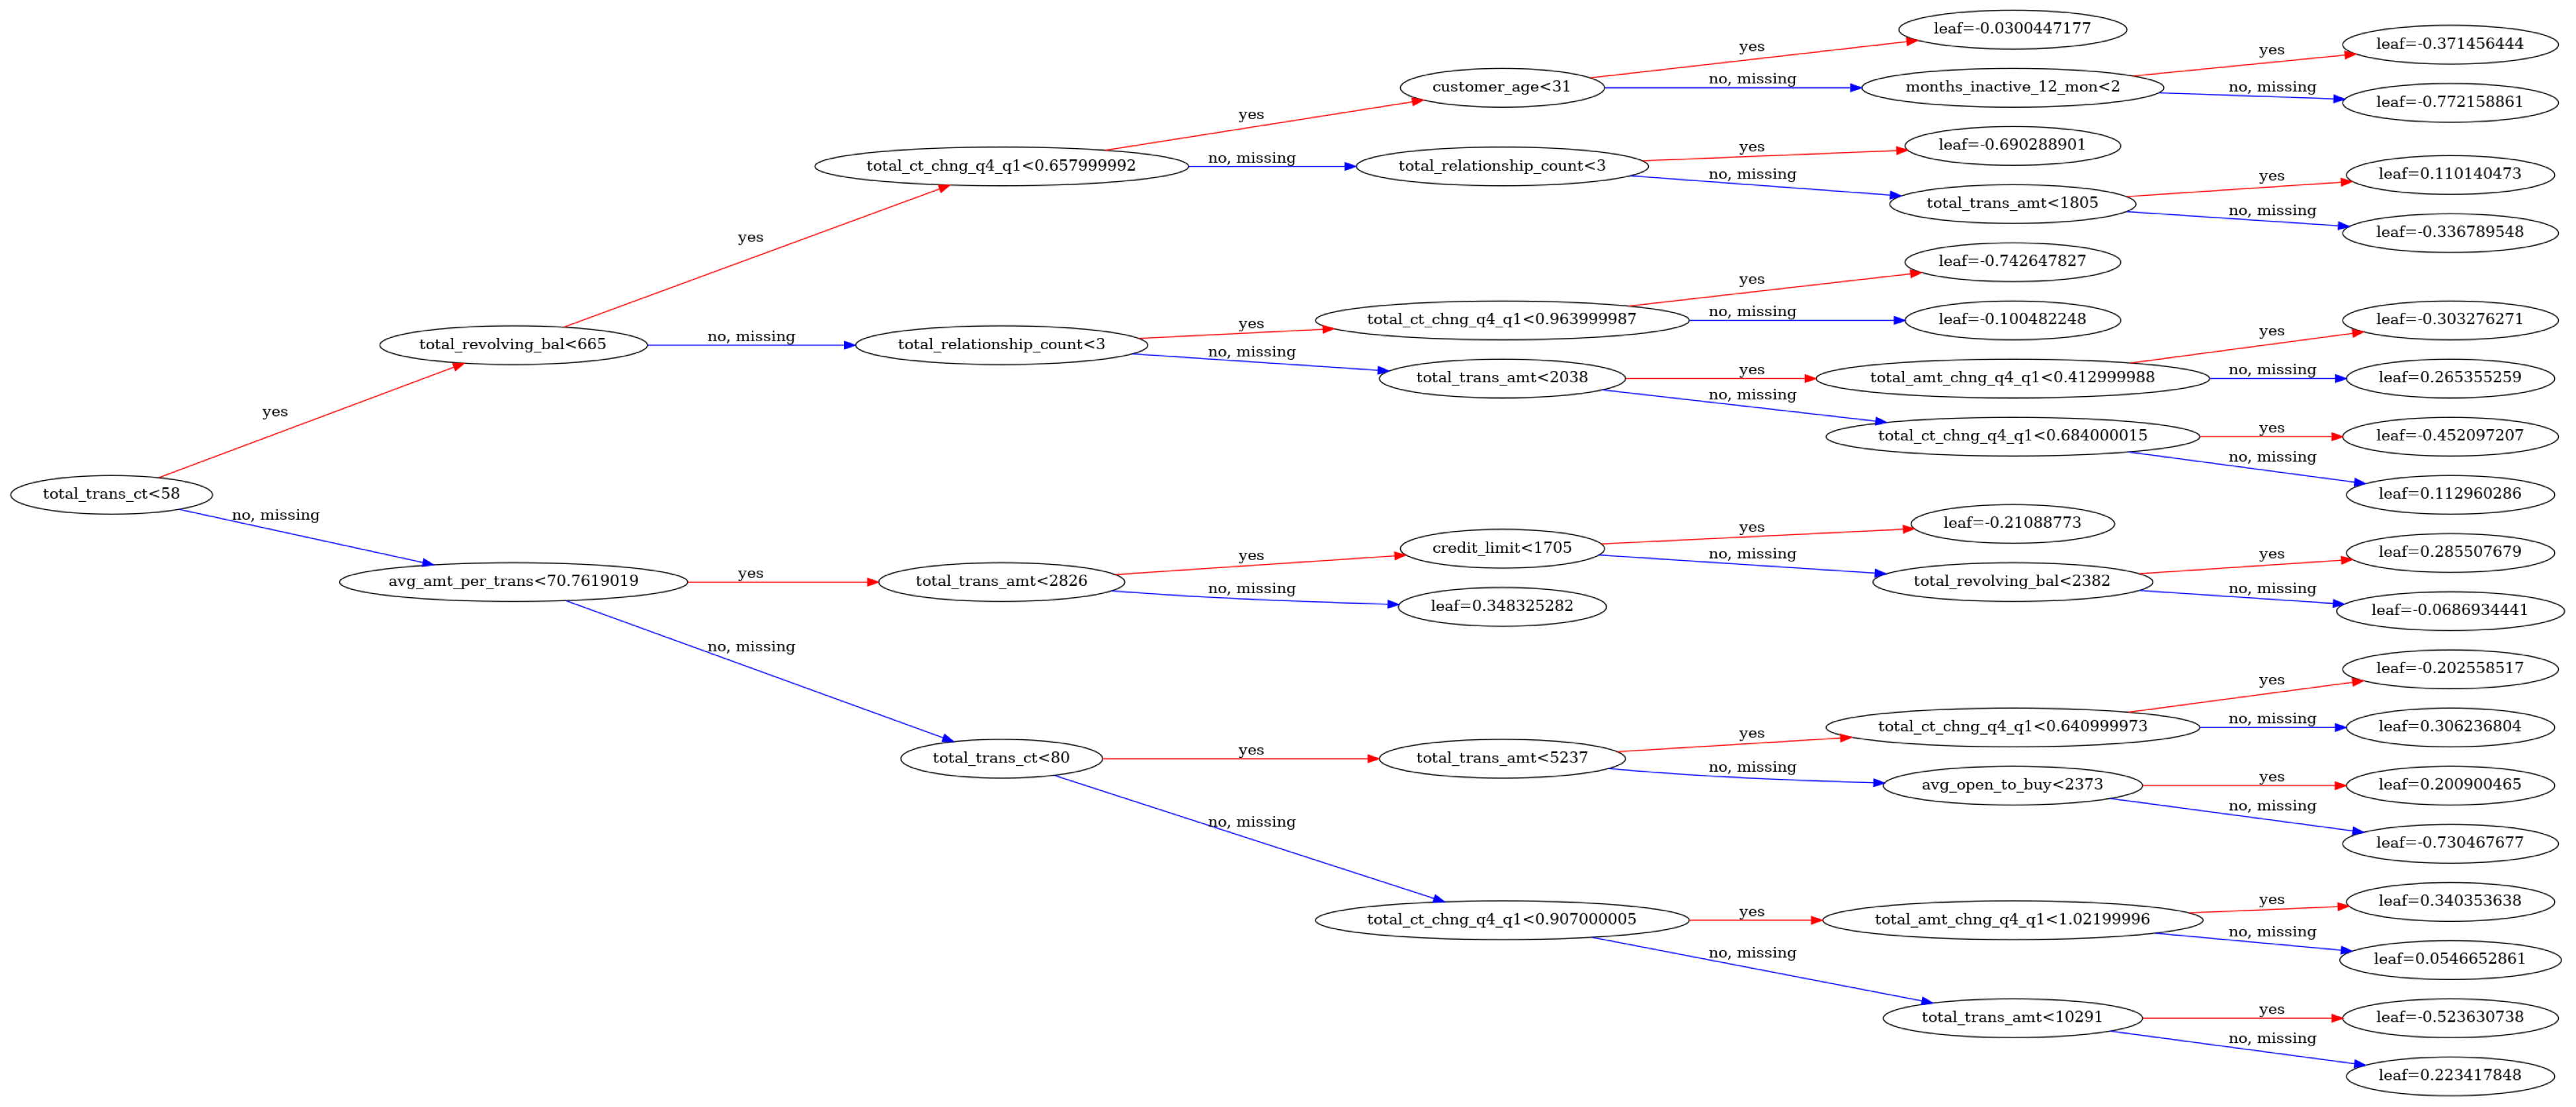

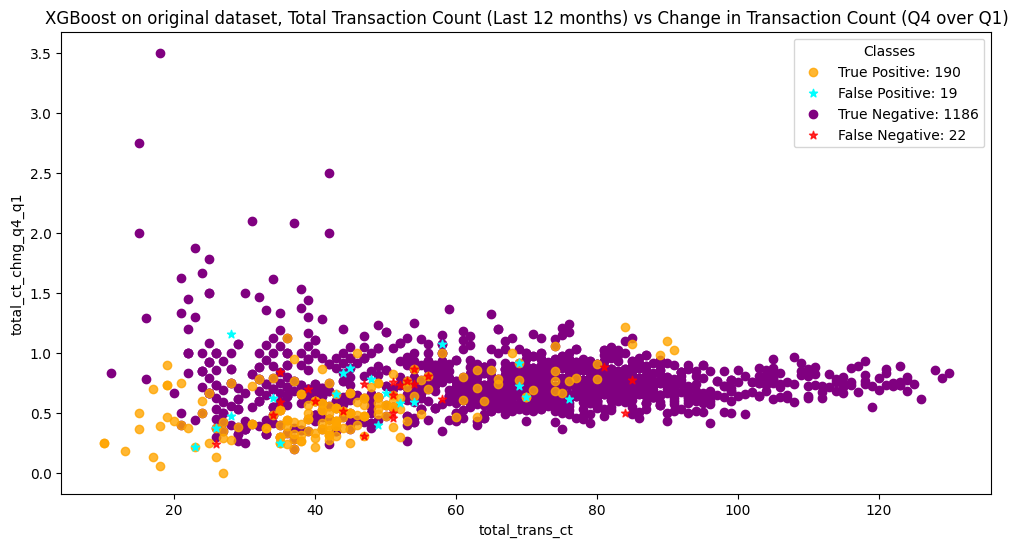

In [174]:
# Use original data to train and test

counter = Counter(y_o)
print("Before bootstrapping: ", counter)

X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)


xgb_classifier_o = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=0.5, eta=0.25, 
                                     max_depth=5, min_split_loss=0, subsample=0.8)

xgb_classifier_o.fit(X_o_train, y_o_train)

y_o_train_pred = xgb_classifier_o.predict(X_o_train)

y_o_pred = xgb_classifier_o.predict(X_o_test)

accuracy = accuracy_score(y_o_test, y_o_pred)
classification_rep = classification_report(y_o_test, y_o_pred)

# print("Accuracy, using original data:", accuracy)
# print("\nClassification Report, using original data:\n", classification_rep)

print("Classification report of XGBoost model using original data to train and test:")
report_generator(xgb_classifier_o, X_o, y_o, y_o_train, y_o_test, y_o_train_pred, y_o_pred)
xgb.plot_tree(xgb_classifier_o, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(50, 50)
fig.savefig('/home/jupyter/tree.png')
plt.show

mscatter_two_layer(X_o_test, y_o_pred, y_o_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='XGBoost on original dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')

In [113]:
# Use smoted data to train and test.

counter = Counter(y_s_train)
print("After SMOTE processing only on the train set: ", counter)

xgb_classifier_s = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=0.5, eta=0.25, 
                                     max_depth=5, min_split_loss=0, subsample=0.8)

xgb_classifier_s.fit(X_s_train, y_s_train)
y_s_train_pred = xgb_classifier_s.predict(X_s_train)

y_s_pred = xgb_classifier_s.predict(X_s_test)

# accuracy = accuracy_score(y_s_test, y_s_pred)
# classification_rep = classification_report(y_s_test, y_s_pred)

# print("XGBoost Accuracy after data smoted:", accuracy)
# print("\nClassification Report after data smoted:\n", classification_rep)

print("Classification report of XGBoost model using SMOTE'd data to train and test:")
report_generator(xgb_classifier, X_s, y_s, y_s_train, y_s_test, y_s_train_pred, y_s_pred)

After SMOTE processing only on the train set:  Counter({True: 4773, False: 2388})
Classification report of XGBoost model using SMOTE'd data to train and test:
Cross-Validation Accuracy: 0.8724192034037349
Training Accuracy: 0.9998603546990644
Testing Accuracy: 0.9748743718592965
Training Precision: 1.0
Testing Precision: 0.9831932773109243
Training Recall: 0.9997904881625812
Testing Recall: 0.9790794979079498
Classification report:
               precision    recall  f1-score   support

       False       0.96      0.97      0.96       596
        True       0.98      0.98      0.98      1195

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



In [118]:
# Use smoted train data to train and original data to test.

xgb_classifier_so = xgb.XGBClassifier(objective='binary:logistic', random_state=42, scale_pos_weight=0.5, eta=0.25, 
                                     max_depth=5, min_split_loss=0, subsample=0.8)

xgb_classifier_so.fit(X_so_train, y_so_train)

y_so_train_pred = xgb_classifier_s.predict(X_so_train)
y_so_pred = xgb_classifier_so.predict(X_o_test)

# accuracy = accuracy_score(y_o_test, y_so_pred)
# classification_rep = classification_report(y_o_test, y_so_pred)

# print("XGBoost Accuracy after data smoted and use original data to test:", accuracy)
# print("\nClassification Report after data smoted and use original data to test:\n", classification_rep)

print("Classification report of XGBoost model using SMOTE'd data to train and original data to test:")
report_generator(xgb_classifier, X_so, y_so, y_so_train, y_o_test, y_so_train_pred, y_so_pred)

Classification report of XGBoost model using SMOTE'd data to train and original data to test:
Cross-Validation Accuracy: 0.9744197069141421
Training Accuracy: 0.995380739081747
Testing Accuracy: 0.963302752293578
Training Precision: 0.9958071278825996
Testing Precision: 0.9816207184628237
Training Recall: 0.9972706277556163
Testing Recall: 0.975103734439834
Classification report:
               precision    recall  f1-score   support

       False       0.86      0.90      0.88       212
        True       0.98      0.98      0.98      1205

    accuracy                           0.96      1417
   macro avg       0.92      0.94      0.93      1417
weighted avg       0.96      0.96      0.96      1417



Before bootstrapping:  Counter({True: 5968, False: 1113})
Classification report of XGBoost model using original data to train and test without HPO:
Cross-Validation Accuracy: 0.9288294080355968
Training Accuracy: 1.0
Testing Accuracy: 0.9668313338038109
Training Precision: 1.0
Testing Precision: 0.9745901639344262
Training Recall: 1.0
Testing Recall: 0.9867219917012449
Classification report:
               precision    recall  f1-score   support

       False       0.92      0.85      0.89       212
        True       0.97      0.99      0.98      1205

    accuracy                           0.97      1417
   macro avg       0.95      0.92      0.93      1417
weighted avg       0.97      0.97      0.97      1417



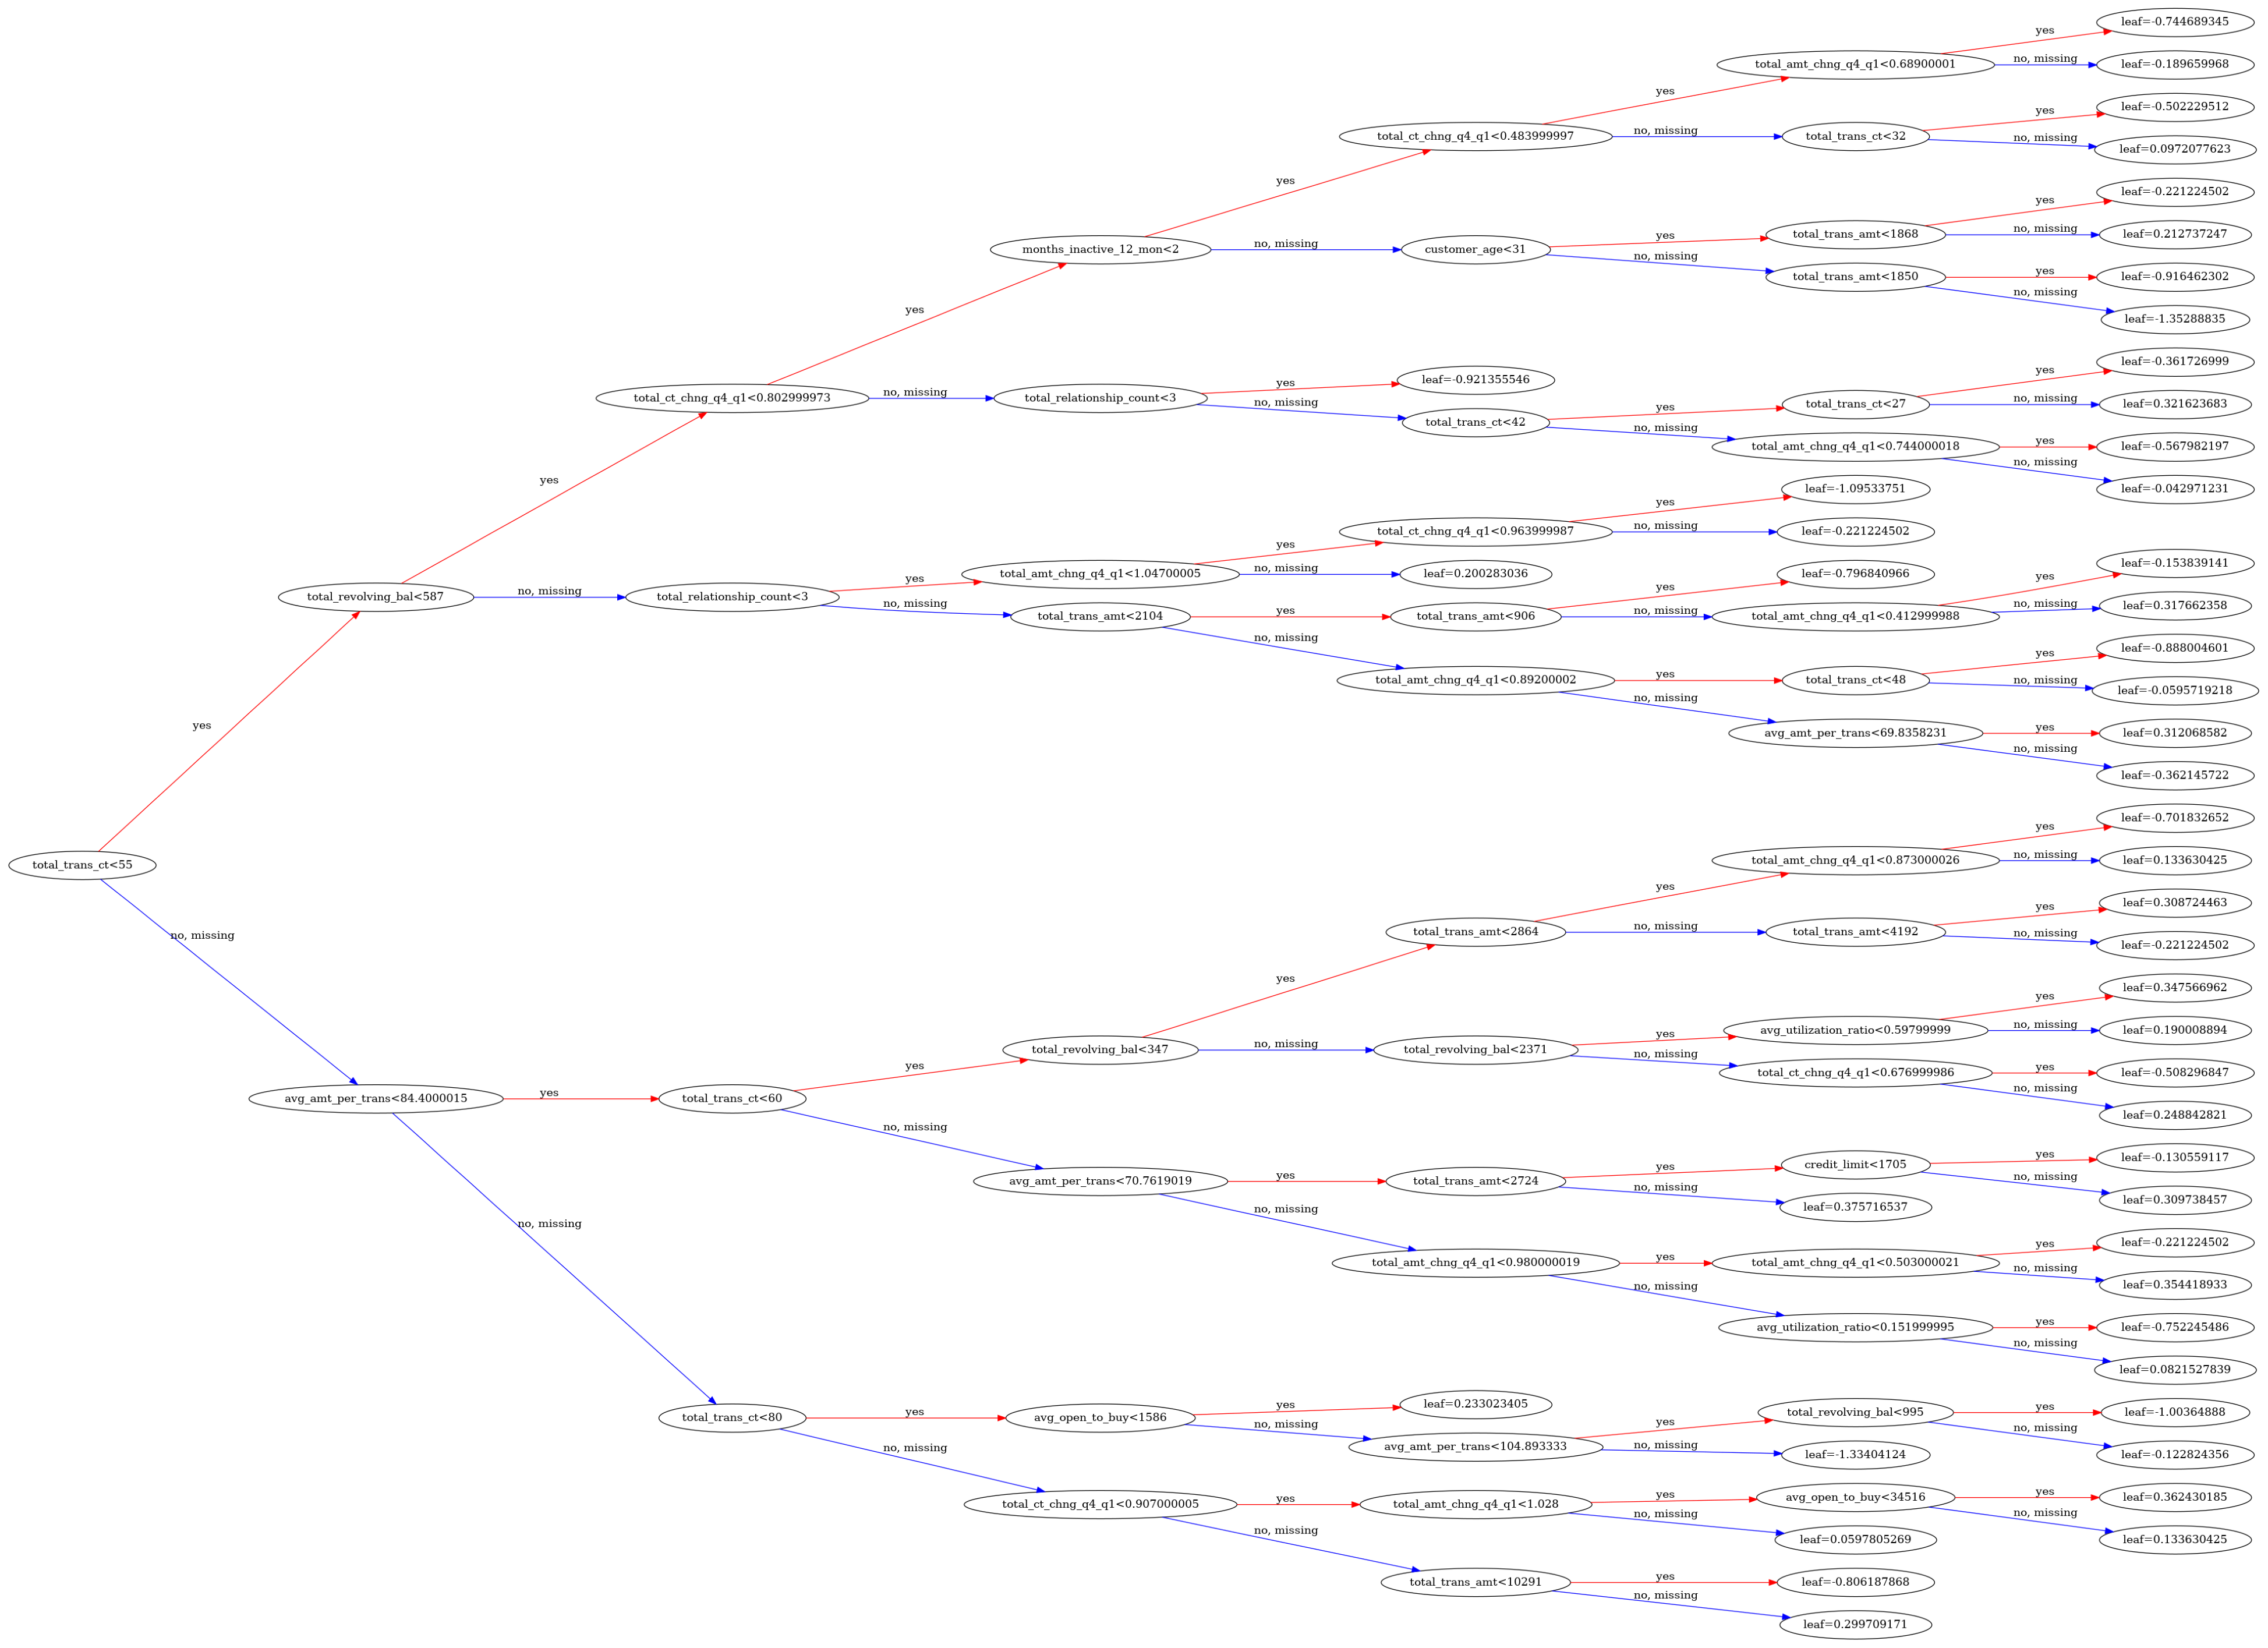

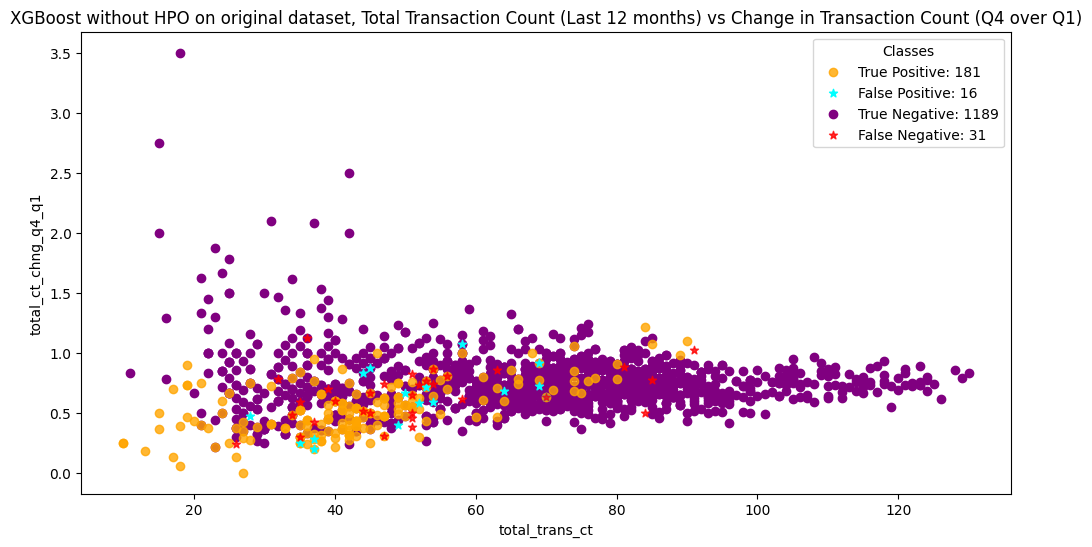

In [173]:
# Use original data to train and test without HPO

counter = Counter(y_o)
print("Before bootstrapping: ", counter)

X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)


xgb_classifier_o = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xgb_classifier_o.fit(X_o_train, y_o_train)

y_o_train_pred = xgb_classifier_o.predict(X_o_train)

y_o_pred = xgb_classifier_o.predict(X_o_test)

accuracy = accuracy_score(y_o_test, y_o_pred)
classification_rep = classification_report(y_o_test, y_o_pred)

print("Classification report of XGBoost model using original data to train and test without HPO:")
report_generator(xgb_classifier_o, X_o, y_o, y_o_train, y_o_test, y_o_train_pred, y_o_pred)
xgb.plot_tree(xgb_classifier_o, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(50, 50)
fig.savefig('/home/jupyter/tree-no-HPO.png')
plt.show

mscatter_two_layer(X_o_test, y_o_pred, y_o_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='XGBoost without HPO on original dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')

# **Random Forest**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf= train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Defining parameter grid for automatic HPO
param_grid = {
    'n_estimators' : [10, 100, 250, 500],
    'max_depth': [None, 10, 25, 40],
    'min_samples_split' : [2, 4, 8]
}

scoring = ['accuracy', 'recall', 'precision']

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scoring, refit=RF_refit_strategy)

# Fit grid search on HPs
grid_search.fit(X_H_train, y_H_train)

# Print the best parameters and scores found
print("Best parameters: ", grid_search.best_params_)



All grid-search results: 
Accuracy: 0.940 (±0.008) recall: 0.976 (±0.004), precision: 0.954 (±0.009), configured score: 3.654322, for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Accuracy: 0.949 (±0.005) recall: 0.986 (±0.002), precision: 0.956 (±0.007), configured score: 3.685342, for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.951 (±0.007) recall: 0.987 (±0.002), precision: 0.956 (±0.008), configured score: 3.689728, for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Accuracy: 0.950 (±0.007) recall: 0.986 (±0.001), precision: 0.956 (±0.007), configured score: 3.686732, for {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.935 (±0.006) recall: 0.979 (±0.004), precision: 0.946 (±0.008), configured score: 3.648699, for {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 10}
Accuracy: 0.946 (±0.007) recall: 0.986 (±0.002), precision: 0.952 (±0.006), configured score: 3.678967, for {'m

In [86]:
counter = Counter(y_test)
print("Test set after bootstrapping:", counter)

# Use the bootstrapped train and test datasets to apply on the RF
rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_split=4)

# rf_classifier.fit(X_train_rf, y_train_rf)
rf_classifier.fit(X_train_rf, y_train_rf)

# Predicting on the training set.
y_train_pred_rf = rf_classifier.predict(X_train_rf)

# y_pred_rf = rf_classifier.predict(X_test_rf)
y_pred_rf = rf_classifier.predict(X_test_rf)

# rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
# rf_classification_rep = classification_report(y_test_rf, y_pred_rf)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
# rf_classification_rep = classification_report(y_test_rf, y_pred_rf)

# print("Accuracy of model using bootstrapped data:", rf_accuracy)

print("Assessment of model using bootstrapped data to train and test:")
report_generator(rf_classifier, X, y, y_train_rf, y_test_rf, y_train_pred_rf, y_pred_rf)

Test set after bootstrapping: Counter({True: 3023, False: 977})
Assessment of model using bootstrapped data to train and test:
Cross-Validation Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 0.9995
Training Precision: 1.0
Testing Precision: 1.0
Training Recall: 1.0
Testing Recall: 0.9993384055573933
Classification report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       977
        True       1.00      1.00      1.00      3023

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [119]:
# Use bootstrapped train data to train, and use original data to test
X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

counter = Counter(y_o_test)
print("Stat in the test set after dropping duplication: ", counter, "\n")

rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_split=4)

rf_classifier.fit(X_bo_train, y_bo_train)

# Predict on the train set.
y_b_train_pred = rf_classifier.predict(X_bo_train)

# Predict on the test set.
y_b_pred = rf_classifier.predict(X_o_test)
'''
accuracy = accuracy_score(y_o_test, y_b_pred)
classification_rep = classification_report(y_o_test, y_b_pred)

print("Accuracy after bootstrapped only the train set:", accuracy)
print("\nClassification Report after bootstrapped only the train set:\n", classification_rep)
'''

print("Assessment of model using bootstrapped data to train and original data to test:")
report_generator(rf_classifier, X_o, y_o, y_bo_train, y_o_test, y_b_train_pred, y_b_pred)

Stat in the test set after dropping duplication:  Counter({True: 1205, False: 212}) 

Assessment of model using bootstrapped data to train and original data to test:
Cross-Validation Accuracy: 0.9248735093238281
Training Accuracy: 0.9998600223964166
Testing Accuracy: 0.9661256175017643
Training Precision: 1.0
Testing Precision: 0.9792874896437448
Training Recall: 0.9997900482888935
Testing Recall: 0.9809128630705394
Classification report:
               precision    recall  f1-score   support

       False       0.89      0.88      0.89       212
        True       0.98      0.98      0.98      1205

    accuracy                           0.97      1417
   macro avg       0.93      0.93      0.93      1417
weighted avg       0.97      0.97      0.97      1417



Stat in the test set after dropping duplication:  Counter({True: 1205, False: 212}) 

Assessment of model using original data to train and test:
Cross-Validation Accuracy: 0.9248735093238281
Training Accuracy: 0.9998234463276836
Testing Accuracy: 0.9590684544812985
Training Precision: 0.9997900923593619
Testing Precision: 0.9651257096512571
Training Recall: 1.0
Testing Recall: 0.9875518672199171
Classification report:
               precision    recall  f1-score   support

       False       0.92      0.80      0.85       212
        True       0.97      0.99      0.98      1205

    accuracy                           0.96      1417
   macro avg       0.94      0.89      0.91      1417
weighted avg       0.96      0.96      0.96      1417



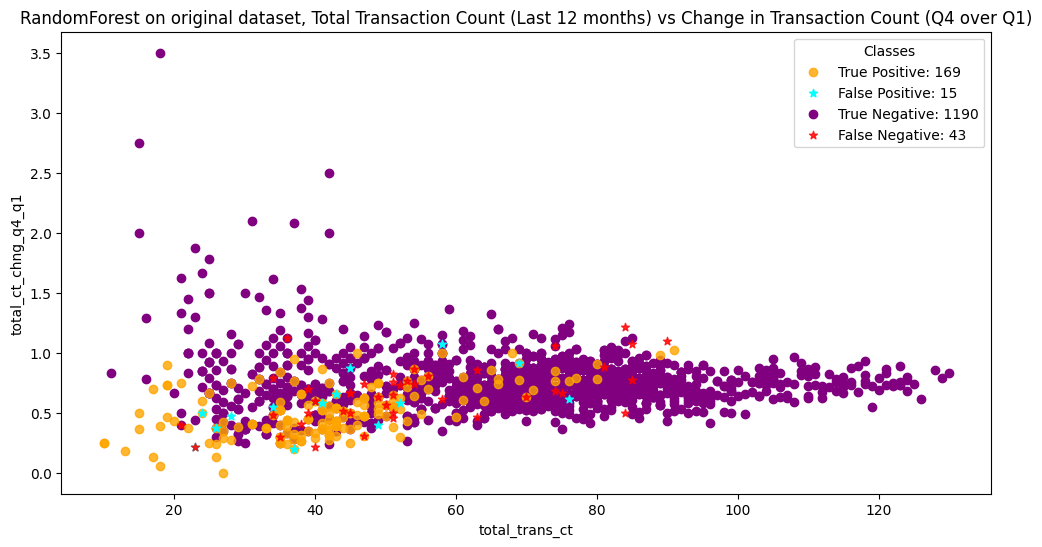

In [170]:
# Use original data to train and test
X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

counter = Counter(y_o_test)
print("Stat in the test set after dropping duplication: ", counter, "\n")

rf_classifier = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_split=4)

rf_classifier.fit(X_o_train, y_o_train)

y_o_train_pred = rf_classifier.predict(X_o_train)

y_o_pred = rf_classifier.predict(X_o_test)

#accuracy = accuracy_score(y_o_test, y_o_pred)
#classification_rep = classification_report(y_o_test, y_o_pred)
print("Assessment of model using original data to train and test:")
report_generator(rf_classifier, X_o, y_o, y_o_train, y_o_test, y_o_train_pred, y_o_pred)

# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_rep)

mscatter_two_layer(X_o_test, y_o_pred, y_o_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='RandomForest on original dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')

In [92]:
# Use smoted data to train and test.
# X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_s, y_s, test_size=0.2, random_state=42)

rf_classifier_s = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_split=4)

rf_classifier_s.fit(X_s_train, y_s_train)

y_s_train_pred = rf_classifier_s.predict(X_s_train)

y_s_pred = rf_classifier_s.predict(X_s_test)

# accuracy = accuracy_score(y_s_test, y_s_pred)
# classification_rep = classification_report(y_s_test, y_s_pred)

# print("RandomForest Accuracy after data smoted:", accuracy)
# print("\nClassification Report after data smoted:\n", classification_rep)

print("Assessment of model using SMOTE'd data to train and test:")
report_generator(rf_classifier_s, X_s, y_s, y_s_train, y_s_test, y_s_train_pred, y_s_pred)

Assessment of model using SMOTE'd data to train and test:
Cross-Validation Accuracy: 0.8632598124077869
Training Accuracy: 0.9998603546990644
Testing Accuracy: 0.9676158570630933
Training Precision: 1.0
Testing Precision: 0.9733555370524563
Training Recall: 0.9997904881625812
Testing Recall: 0.9782426778242678
Classification report:
               precision    recall  f1-score   support

       False       0.96      0.95      0.95       596
        True       0.97      0.98      0.98      1195

    accuracy                           0.97      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.97      0.97      0.97      1791



In [96]:
# Use smoted data to train and original data to test.
# X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_s, y_s, test_size=0.2, random_state=42)

rf_classifier_so = RandomForestClassifier(n_estimators=250, random_state=42, min_samples_split=4)

rf_classifier_so.fit(X_so_train, y_so_train)

y_so_train_pred = rf_classifier_so.predict(X_so_train)

y_so_pred = rf_classifier_so.predict(X_o_test)

# accuracy = accuracy_score(y_o_test, y_so_pred)
# classification_rep = classification_report(y_o_test, y_so_pred)

# print("RandomForest Accuracy after data smoted:", accuracy)
# print("\nClassification Report after data smoted:\n", classification_rep)


print("Assessment of model using SMOTE'd data to train and original data test:")
report_generator(rf_classifier_s, X_s, y_s, y_so_train, y_o_test, y_so_train_pred, y_so_pred)

Assessment of model using SMOTE'd data to train and original data test:
Cross-Validation Accuracy: 0.8632598124077869
Training Accuracy: 1.0
Testing Accuracy: 0.9611856033874383
Training Precision: 1.0
Testing Precision: 0.9791666666666666
Training Recall: 1.0
Testing Recall: 0.975103734439834
Classification report:
               precision    recall  f1-score   support

       False       0.86      0.88      0.87       212
        True       0.98      0.98      0.98      1205

    accuracy                           0.96      1417
   macro avg       0.92      0.93      0.92      1417
weighted avg       0.96      0.96      0.96      1417



Stat in the test set after dropping duplication:  Counter({True: 1205, False: 212}) 

Assessment of model using original data to train and test:
Cross-Validation Accuracy: 0.9241671949571186
Training Accuracy: 1.0
Testing Accuracy: 0.9562455892731122
Training Precision: 1.0
Testing Precision: 0.9635036496350365
Training Recall: 1.0
Testing Recall: 0.9858921161825727
Classification report:
               precision    recall  f1-score   support

       False       0.91      0.79      0.84       212
        True       0.96      0.99      0.97      1205

    accuracy                           0.96      1417
   macro avg       0.94      0.89      0.91      1417
weighted avg       0.96      0.96      0.95      1417



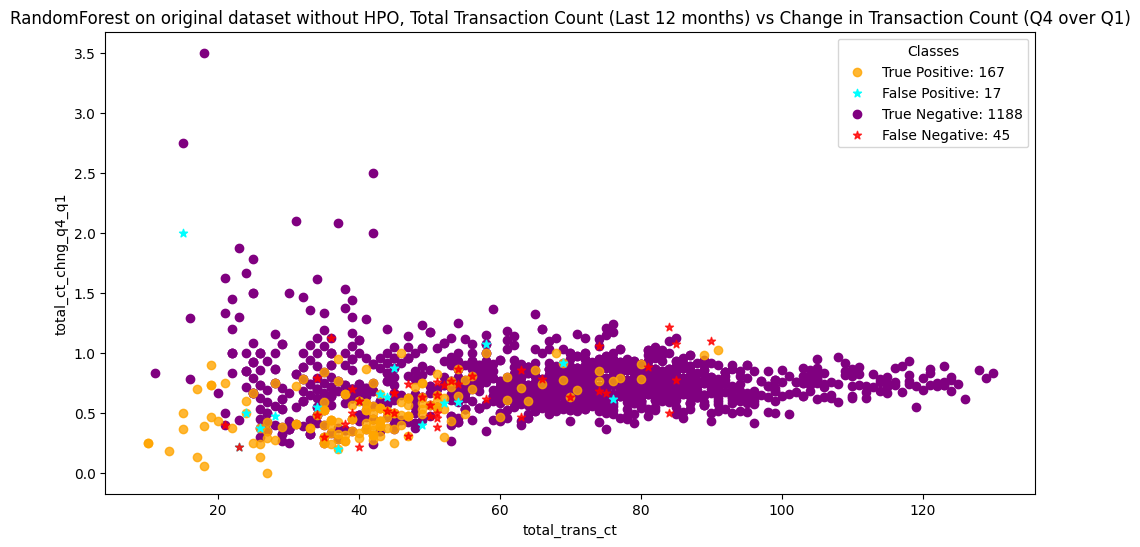

In [169]:
# Use original data to train and test, with all hyperparameters being default
# X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

counter = Counter(y_o_test)
print("Stat in the test set after dropping duplication: ", counter, "\n")

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_o_train, y_o_train)

y_o_train_pred = rf_classifier.predict(X_o_train)

y_o_pred = rf_classifier.predict(X_o_test)

#accuracy = accuracy_score(y_o_test, y_o_pred)
#classification_rep = classification_report(y_o_test, y_o_pred)
print("Assessment of model using original data to train and test:")
report_generator(rf_classifier, X_o, y_o, y_o_train, y_o_test, y_o_train_pred, y_o_pred)

# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_rep)

mscatter_two_layer(X_o_test, y_o_pred, y_o_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='RandomForest on original dataset without HPO, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')

# **Support Vector Machine(SVM)**

In [123]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import time

# Use bootstrapped data to train and test on LinearSVC
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_o, y_o, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# svm_classifier = SVC(kernel='linear', random_state=42)
start = time.time()
svm_classifier.fit(X_train_svm, y_train_svm)
end = time.time()

print("Elapsed time:", end - start, "s.")
y_pred_train_svm = svm_classifier.predict(X_train_svm)
y_pred_svm = svm_classifier.predict(X_test_svm)

# svm_accuracy = accuracy_score(y_test_svm, y_pred_svm)
# svm_classification_rep = classification_report(y_test_svm, y_pred_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

print("Assessment of LinearSVC model using bootstrapped data to train and test:")
report_generator(svm_classifier, X, y, y_train_svm, y_test_svm, y_pred_train_svm, y_pred_svm)

Elapsed time: 0.24756073951721191 s.
Assessment of LinearSVC model using bootstrapped data to train and test:
Cross-Validation Accuracy: 0.8709
Training Accuracy: 0.8728125
Testing Accuracy: 0.8815
Training Precision: 0.9320354597601251
Testing Precision: 0.9423811176674766
Training Recall: 0.8953828170660433
Testing Recall: 0.898114455838571
Classification report:
               precision    recall  f1-score   support

       False       0.72      0.83      0.77       977
        True       0.94      0.90      0.92      3023

    accuracy                           0.88      4000
   macro avg       0.83      0.86      0.85      4000
weighted avg       0.89      0.88      0.88      4000



In [125]:

# Use bootstrapped train data to train and use original data to test on LinearSVC
X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)
# X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_o, y_o, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# svm_classifier = SVC(kernel='linear', random_state=42)

start = time.time()
svm_classifier.fit(X_bo_train, y_bo_train)
end = time.time()

print("Elapsed time:", end - start, "s.")

y_pred_train_svm = svm_classifier.predict(X_bo_train)
y_pred_svm = svm_classifier.predict(X_o_test)

# svm_accuracy = accuracy_score(y_o_test, y_pred_svm)
# svm_classification_rep = classification_report(y_o_test, y_pred_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

print("Assessment of LinearSVC model using bootstrapped data to train and original data to test:")
report_generator(svm_classifier, X_bo, y_bo, y_bo_train, y_o_test, y_pred_train_svm, y_pred_svm)

Elapsed time: 0.10861921310424805 s.
Assessment of LinearSVC model using bootstrapped data to train and original data to test:
Cross-Validation Accuracy: 0.8623992721955798
Training Accuracy: 0.8576427771556551
Testing Accuracy: 0.8532110091743119
Training Precision: 0.9241394927536232
Testing Precision: 0.9698397737983034
Training Recall: 0.8568129330254042
Testing Recall: 0.8539419087136929
Classification report:
               precision    recall  f1-score   support

       False       0.51      0.85      0.63       212
        True       0.97      0.85      0.91      1205

    accuracy                           0.85      1417
   macro avg       0.74      0.85      0.77      1417
weighted avg       0.90      0.85      0.87      1417



Elapsed time: 0.07599711418151855 s.
Assessment of model using original data to train and test:
Cross-Validation Accuracy: 0.8717836082437233
Training Accuracy: 0.904837570621469
Testing Accuracy: 0.9061397318278053
Training Precision: 0.9455696202531646
Testing Precision: 0.9481605351170569
Training Recall: 0.9410035691790888
Testing Recall: 0.9410788381742738
Classification report:
               precision    recall  f1-score   support

       False       0.68      0.71      0.69       212
        True       0.95      0.94      0.94      1205

    accuracy                           0.91      1417
   macro avg       0.81      0.82      0.82      1417
weighted avg       0.91      0.91      0.91      1417



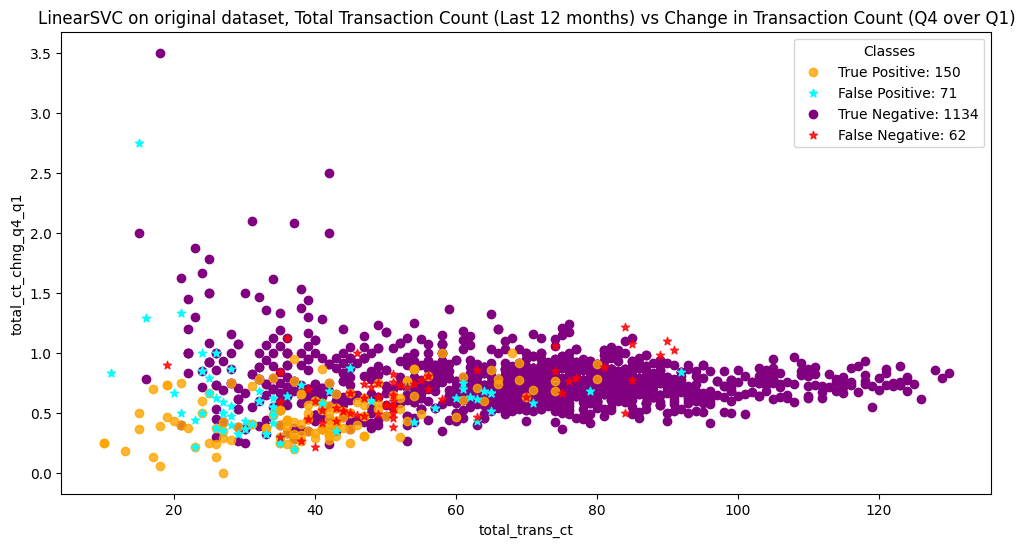

In [126]:
# Use original data to train and test on LinearSVC
X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# svm_classifier = SVC(kernel='linear', random_state=42)

start = time.time()
svm_classifier.fit(X_o_train, y_o_train)
end = time.time()

print("Elapsed time:", end - start, "s.")

y_pred_train_svm = svm_classifier.predict(X_o_train)

y_pred_svm = svm_classifier.predict(X_o_test)

svm_accuracy = accuracy_score(y_o_test, y_pred_svm)
svm_classification_rep = classification_report(y_o_test, y_pred_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

print("Assessment of model using original data to train and test:")
report_generator(svm_classifier, X_o, y_o, y_o_train, y_o_test, y_pred_train_svm, y_pred_svm)

mscatter_two_layer(X_o_test, y_pred_svm, y_o_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='LinearSVC on original dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')

In [127]:
# Use smoted data to train and test on LinearSVC
# X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# svm_classifier = SVC(kernel='linear', random_state=42)

start = time.time()
svm_classifier.fit(X_s_train, y_s_train)
end = time.time()

print("Elapsed time:", end - start, "s.")

y_pred_s_train_svm = svm_classifier.predict(X_s_train)
y_pred_s_svm = svm_classifier.predict(X_s_test)

# svm_accuracy = accuracy_score(y_s_test, y_pred_s_svm)
# svm_classification_rep = classification_report(y_s_test, y_pred_s_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

print("Assessment of LinearSVC model using SMOTE'd data to train and test:")
report_generator(svm_classifier, X_s, y_s, y_s_train, y_s_test, y_pred_s_train_svm, y_pred_s_svm)

Elapsed time: 0.1551213264465332 s.
Assessment of LinearSVC model using SMOTE'd data to train and test:
Cross-Validation Accuracy: 0.8019523439668859
Training Accuracy: 0.9065772936740679
Testing Accuracy: 0.897822445561139
Training Precision: 0.9439636520986586
Testing Precision: 0.931740614334471
Training Recall: 0.9141001466582862
Testing Recall: 0.9138075313807531
Classification report:
               precision    recall  f1-score   support

       False       0.83      0.87      0.85       596
        True       0.93      0.91      0.92      1195

    accuracy                           0.90      1791
   macro avg       0.88      0.89      0.89      1791
weighted avg       0.90      0.90      0.90      1791



In [128]:
# Use smoted data to train and original data to test on LinearSVC

# X_s_train, X_s_test, y_s_train, y_s_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# svm_classifier = SVC(kernel='linear', random_state=42)

start = time.time()
svm_classifier.fit(X_so_train, y_so_train)
end = time.time()

print("Elapsed time:", end - start, "s.")

y_pred_so_train_svm = svm_classifier.predict(X_so_train)
y_pred_so_svm = svm_classifier.predict(X_o_test)

# svm_accuracy = accuracy_score(y_o_test, y_pred_so_svm)
# svm_classification_rep = classification_report(y_o_test, y_pred_so_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

print("Assessment of LinearSVC model using SMOTE'd data to train and test:")
report_generator(svm_classifier, X_so, y_so, y_so_train, y_o_test, y_pred_so_train_svm, y_pred_so_svm)

Elapsed time: 0.15901541709899902 s.
Assessment of LinearSVC model using SMOTE'd data to train and test:
Cross-Validation Accuracy: 0.8977964684572621
Training Accuracy: 0.9049552071668533
Testing Accuracy: 0.8856739590684545
Training Precision: 0.941991341991342
Testing Precision: 0.9570552147239264
Training Recall: 0.9137098467352509
Testing Recall: 0.9062240663900415
Classification report:
               precision    recall  f1-score   support

       False       0.59      0.77      0.67       212
        True       0.96      0.91      0.93      1205

    accuracy                           0.89      1417
   macro avg       0.77      0.84      0.80      1417
weighted avg       0.90      0.89      0.89      1417



In [102]:
# svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5)
# # svm_classifier = SVC(kernel='linear', random_state=42)

# start = time.time()
# svm_classifier.fit(X_trial_train, y_trial_train)
# end = time.time()

# print("Elapsed time:", end - start, "s.")

# y_pred_trial_svm = svm_classifier.predict(X_trial_test)

# svm_accuracy = accuracy_score(y_trial_test, y_pred_trial_svm)
# svm_classification_rep = classification_report(y_trial_test, y_pred_trial_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

Elapsed time: 0.13138961791992188 s.
Accuracy: 0.9117854622441779

Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.59      0.67       212
        True       0.93      0.97      0.95      1205

    accuracy                           0.91      1417
   macro avg       0.85      0.78      0.81      1417
weighted avg       0.91      0.91      0.91      1417



Elapsed time: 0.14956355094909668 s.
Accuracy: 0.9019054340155258

Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.73      0.69       212
        True       0.95      0.93      0.94      1205

    accuracy                           0.90      1417
   macro avg       0.80      0.83      0.82      1417
weighted avg       0.91      0.90      0.90      1417



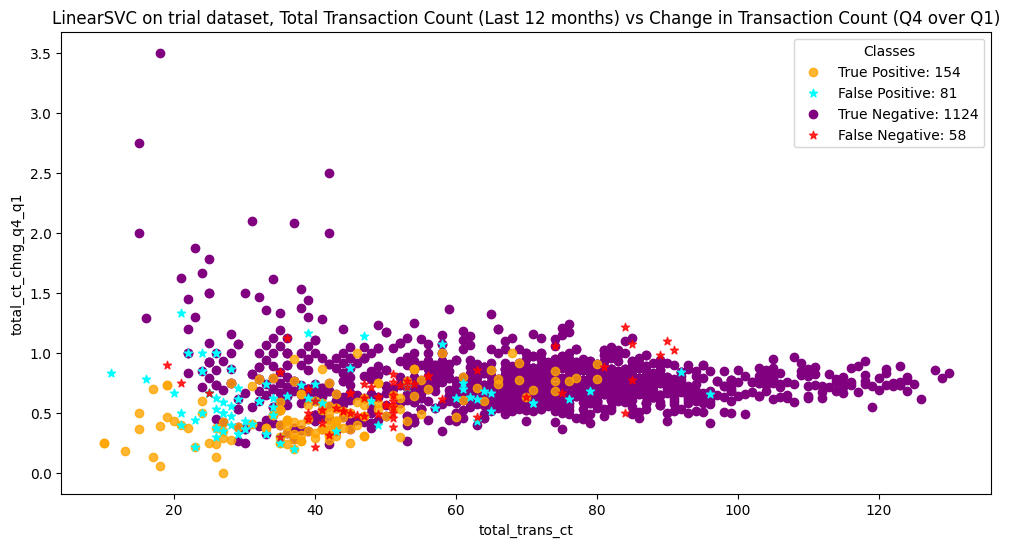

In [106]:

# # from sklearn.inspection import DecisionBoundaryDisplay
# #import matplotlib.markers as mmarkers

# # Use new trial data to train and test on LinearSVC
# X_o_train, X_o_test, y_o_train, y_o_test= train_test_split(X_o, y_o, test_size=0.2, random_state=42)

# svm_classifier = LinearSVC(dual="auto", random_state=42, tol=1e-5, class_weight={1:0.5})
# # svm_classifier = SVC(kernel='linear', random_state=42)

# start = time.time()
# svm_classifier.fit(X_trial_train, y_trial_train)
# end = time.time()

# print("Elapsed time:", end - start, "s.")

# y_pred_trial_svm = svm_classifier.predict(X_trial_test)

# svm_accuracy = accuracy_score(y_trial_test, y_pred_trial_svm)
# svm_classification_rep = classification_report(y_trial_test, y_pred_trial_svm)

# print("Accuracy:", svm_accuracy)
# print("\nClassification Report:\n", svm_classification_rep)

# mscatter_two_layer(X_trial_test, y_pred_trial_svm, y_trial_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
#                    title='LinearSVC on trial dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')


# **In-house implementation of Decision Tree**

In [82]:
feature_bank


attrition_flag  customer_age  dependent_count education_level  \
0     Existing Customer            45                3     High School   
1     Existing Customer            49                5        Graduate   
2     Existing Customer            51                3        Graduate   
3     Existing Customer            40                3      Uneducated   
4     Existing Customer            44                2        Graduate   
...                 ...           ...              ...             ...   
7076  Existing Customer            54                1     High School   
7077  Existing Customer            56                1        Graduate   
7078  Existing Customer            50                2        Graduate   
7079  Attrited Customer            44                1     High School   
7080  Attrited Customer            43                2        Graduate   

     marital_status income_category card_category  months_on_book  \
0           Married     $60K - $80K          Blue              39   
1            Single  Less than $40K          Blue              44   
2           Married    $80K - $120K          Blue              36   
3           Married     $60K - $80K          Blue              21   
4           Married     $40K - $60K          Blue              36   
...             ...             ...           ...             ...   
7076         Single     $60K - $80K          Blue              34   
7077         Single  Less than $40K          Blue              50   
7078         Single     $40K - $60K          Blue              40   
7079        Married  Less than $40K          Blue              36   
7080        Married  Less than $40K        Silver              25   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                            5                       1                      3   
1                            6                       1                      2   
2                            4                       1                      0   
3                            5                       1                      0   
4                            3                       1                      2   
...                        ...                     ...                    ...   
7076                         5                       2                      0   
7077                         4                       1                      4   
7078                         3                       2                      3   
7079                         5                       3                      4   
7080                         6                       2                      4   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
0          12691.0                  777          11914.0   
1           8256.0                  864           7392.0   
2           3418.0                    0           3418.0   
3           4716.0                    0           4716.0   
4           4010.0                 1247           2763.0   
...            ...                  ...              ...   
7076       13940.0                 2109          11831.0   
7077        3688.0                  606           3082.0   
7078        4003.0                 1851           2152.0   
7079        5409.0                    0           5409.0   
7080       10388.0                 1961           8427.0   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0                    1.335             1144              42   
1                    1.541             1291              33   
2                    2.594             1887              20   
3                    2.175              816              28   
4                    1.376             1088              24   
...                    ...              ...             ...   
7076                 0.660            15577             114   
7077                 0.570            14596             120   
7078                 0.703    

Model accuracy on the test set: 0.8285
Counter({1: 1070, 0: 347})
Counter({1: 4182, 0: 1482})
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57       212
           1       0.95      0.84      0.89      1205

    accuracy                           0.83      1417
   macro avg       0.70      0.79      0.73      1417
weighted avg       0.88      0.83      0.84      1417

Assessment of model using original data to train and test:
Training Accuracy: 0.8363347457627118
Testing Accuracy: 0.8285109386026818
Training Precision: 0.9586322333811573
Testing Precision: 0.9495327102803738
Training Recall: 0.8416964098257401
Testing Recall: 0.8431535269709544
Classification report:
               precision    recall  f1-score   support

           0       0.46      0.75      0.57       212
           1       0.95      0.84      0.89      1205

    accuracy                           0.83      1417
   macro avg       0.70      0.7

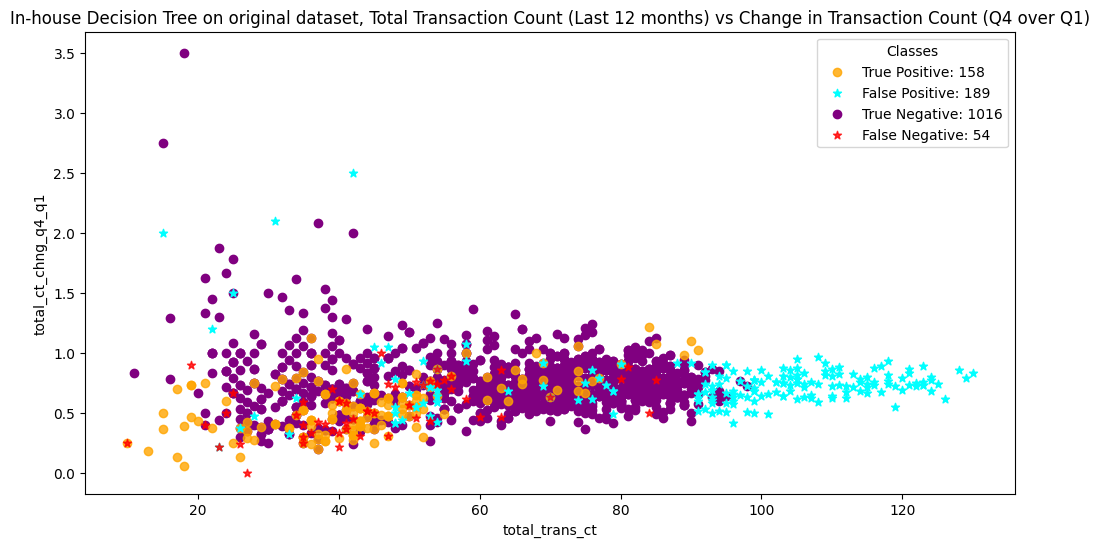

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_in_house_impl_features = feature_bank.copy()

# Identify categorical columns (simplified example)
categorical_cols = df_in_house_impl_features.select_dtypes(include=['object']).columns
 
# Apply label encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_in_house_impl_features[col] = le.fit_transform(df_in_house_impl_features[col])
    label_encoders[col] = le  # Store the label encoder

# Now df is entirely numeric and can be used for model training
X_ih = df_in_house_impl_features.drop('attrition_flag', axis=1)
y_ih = df_in_house_impl_features['attrition_flag']

# print(y_o_test.index)
# print(y_ih.loc[y_o_test.index])
# print(y_o_test)

X_ih_train = X_ih.loc[X_o_train.index]
X_ih_test = X_ih.loc[X_o_test.index]
y_ih_train = y_ih.loc[y_o_train.index]
y_ih_test = y_ih.loc[y_o_test.index]
 
# For prediction, ensure you encode the features using the stored encoders
def encode_features(sample, encoders):
    for col, le in encoders.items():
        if col in sample:
            sample[col] = le.transform([sample[col]])[0]
    return sample
    
class DecisionNode:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        # Information about the node
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        
def gini_impurity(y):
    m = len(y)
    return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))
 
 
def split(X, y, min_samples_split):
    m, n = X.shape
    if m < min_samples_split:
        return None, None  # Don't split if the node is too small
 
    # Create a mapping from class labels to indices
    unique_classes = np.unique(y)
    class_index = {c: i for i, c in enumerate(unique_classes)}
    num_parent = [np.sum(y == c) for c in unique_classes]
    best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
    best_idx, best_thr = None, None
 
    for idx in range(n):  # Loop through all features
        sorted_idx = X[:, idx].argsort()
        thresholds, classes = X[sorted_idx, idx], y[sorted_idx]
        num_left = [0] * len(unique_classes)
        num_right = num_parent.copy()
 
        for i in range(1, m):  # Process potential splits
            c = classes[i - 1]
            class_idx = class_index[c]
            num_left[class_idx] += 1
            num_right[class_idx] -= 1
 
            if i < min_samples_split or m - i < min_samples_split:
                continue  # Skip if the resulting nodes are too small
 
            gini_left = 1.0 - sum((num_left[j] / i) ** 2 for j in range(len(unique_classes)))
            gini_right = 1.0 - sum((num_right[j] / (m - i)) ** 2 for j in range(len(unique_classes)))
            gini = (i * gini_left + (m - i) * gini_right) / m
 
            if thresholds[i] == thresholds[i - 1]:
                continue
            if gini < best_gini:
                best_gini = gini
                best_idx = idx
                best_thr = (thresholds[i] + thresholds[i - 1]) / 2
 
    return best_idx, best_thr
 
 
def grow_tree(X, y, depth=0, max_depth=None, min_samples_split=2):
    # Convert to NumPy array if X and y are pandas DataFrame/Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
 
    num_samples_per_class = [np.sum(y == i) for i in np.unique(y)]
    predicted_class = np.argmax(num_samples_per_class)
    node = DecisionNode(
        gini=gini_impurity(y),
        num_samples=len(y),
        num_samples_per_class=num_samples_per_class,
        predicted_class=predicted_class,
    )
 
    # Stop splitting if the depth exceeds max depth or the node is too small
    if depth < max_depth:
        idx, thr = split(X, y, min_samples_split)
        if idx is not None:  # If a valid split is found
            indices_left = X[:, idx] < thr
            X_left, y_left = X[indices_left], y[indices_left]
            X_right, y_right = X[~indices_left], y[~indices_left]
            node.feature_index = idx
            node.threshold = thr
            node.left = grow_tree(X_left, y_left, depth + 1, max_depth, min_samples_split)
            node.right = grow_tree(X_right, y_right, depth + 1, max_depth, min_samples_split)
    return node
 
tree = grow_tree(X_ih_train, y_ih_train, max_depth=5, min_samples_split=10)
 
def predict(sample, tree):
    # Ensure sample is a properly formatted numpy array
    if isinstance(sample, pd.Series):
        sample = sample.values
    elif not isinstance(sample, np.ndarray):
        sample = np.array(sample)
    while tree.left:
        if sample[tree.feature_index] < tree.threshold:
            tree = tree.left
        else:
            tree = tree.right
    return tree.predicted_class
 
# When making predictions:
if isinstance(X_ih_test, pd.DataFrame):
    X_ih_test_np = X_ih_test.values
else:
    X_ih_test_np = X_ih_test  # Assuming X_test is already in the correct format
    
if isinstance(X_ih_train, pd.DataFrame):
    X_ih_train_np = X_ih_train.values
else:
    X_ih_train_np = X_ih_train  # Assuming X_test is already in the correct format
 
y_pred = [predict(x, tree) for x in X_ih_test_np]
 
 
def accuracy(y_true, y_pred):
    """Calculate the percentage of correctly predicted instances."""
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)
 
# Example usage assuming the tree has been appropriately trained
y_ih_pred = [predict(x, tree) for x in X_ih_test_np]  # Make sure each x is an array
y_ih_train_pred = [predict(x, tree) for x in X_ih_train_np]  # Make sure each x is an array

# Calculate accuracy
test_accuracy = accuracy(y_ih_test.to_numpy(), y_ih_pred) if isinstance(y_ih_test, pd.Series) else accuracy(np.array(y_ih_test), y_ih_pred)
print(f"Model accuracy on the test set: {test_accuracy:.4f}")

counter = Counter(y_ih_pred)
print(counter)

counter = Counter(y_ih_train_pred)
print(counter)

# Generate a classification report
class_report = classification_report(y_ih_test, y_ih_pred)
print("Classification Report:")
print(class_report)


print("Assessment of model using original data to train and test:")
# cv_accuracy = cross_val_score(predictor, X, y, cv=5, scoring='accuracy')
# print(f"Cross-Validation Accuracy: {cv_accuracy.mean()}")

print("Training Accuracy:", accuracy_score(y_ih_train, y_ih_train_pred))
print("Testing Accuracy:", accuracy_score(y_ih_test, y_ih_pred))
print("Training Precision:", precision_score(y_ih_train, y_ih_train_pred, average='binary'))
print("Testing Precision:", precision_score(y_ih_test, y_ih_pred, average='binary'))
print("Training Recall:", recall_score(y_ih_train, y_ih_train_pred, average='binary'))
print("Testing Recall:", recall_score(y_ih_test, y_ih_pred, average='binary'))

classification_rep = classification_report(y_ih_test, y_ih_pred)
print("Classification report:\n", classification_rep)


mscatter_two_layer(X_ih_test, y_ih_pred, y_ih_test, 'total_trans_ct', 'total_ct_chng_q4_q1', 'orange', 'purple', 'red', 'cyan',
                   title='In-house Decision Tree on original dataset, Total Transaction Count (Last 12 months) vs Change in Transaction Count (Q4 over Q1)')



In [ ]:
df_in_house_impl_features